#Ï¢ÖÌï©Ïã§Ïäµ2

## 0. ÏãúÏûëÏΩîÎìú

In [1]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù Î™®Îç∏
import statsmodels.formula.api as smf
# ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Ï†ïÍ∑úÏÑ± ÌôïÏù∏: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ÌïôÏäµÏö©/ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Ìòï
from sklearn.linear_model import LinearRegression
# Î≥ÄÏàò ÏÑ†ÌÉùÎ≤ï(ÌõÑÏßÑÏ†úÍ±∞Î≤ï)
from sklearn.feature_selection import RFE
# scale Î≥ÄÌôò -> ÌëúÏ§ÄÌôî ÌöåÍ∑ÄÍ≥ÑÏàò ÏÇ∞Ï∂ú
from sklearn.preprocessing import StandardScaler
# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import r2_score
# ÏÑ†Ìòï Î™®Îç∏
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: ÎÇòÎ¨¥ Íµ¨Ï°∞ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
from sklearn.tree import export_graphviz
# graphviz : ÎÇòÎ¨¥ Íµ¨Ï°∞ ÏãúÍ∞ÅÌôî  (.dot ÌôïÏû•Ïûê ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Îì±)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:train, test
from sklearn.model_selection import train_test_split
# ÏòàÏ∏°/ÌöåÍ∑Ä Decision Tree
from sklearn.tree import DecisionTreeRegressor
# ÏòàÏ∏°/ÌöåÍ∑Ä Random Forest
from sklearn.ensemble import RandomForestRegressor
# ÏµúÏ†Å Î™®Îç∏, ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
from sklearn.model_selection import GridSearchCV
# ÏòàÏ∏°/ÌöåÍ∑Ä Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÎßëÏùÄ Í≥†Îîï)
matplotlib.rc("font", family='Malgun Gothic')
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'NanumGothic'

# Ïã§ÌñâÍ≤∞Í≥º Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÏô∏
import warnings

warnings.filterwarnings('ignore')


In [2]:
df_raw = pd.read_csv('./data/SCALEÎ∂àÎüâ.csv',encoding = 'euc-kr')

In [3]:
df_raw.head()

plate_no        rolling_date scale   spec_long spec_country steel_kind  \
0  PLT_1001  03JAN2023:07:07:53    ÏñëÌíà  AB/EH32-TM           ÎØ∏Íµ≠          T   
1  PLT_1002  03JAN2023:07:21:22    ÏñëÌíà  AB/EH32-TM           ÎØ∏Íµ≠          T   
2  PLT_1003  03JAN2023:07:31:15    ÏñëÌíà   NV-E36-TM           ÏòÅÍµ≠          T   
3  PLT_1004  03JAN2023:07:41:01    ÏñëÌíà   NV-E36-TM           ÏòÅÍµ≠          T   
4  PLT_1005  03JAN2023:07:52:40    ÏñëÌíà  BV-EH36-TM          ÌîÑÎûëÏä§          T   

   pt_thick  pt_width  pt_length hsb  ... fur_input_row fur_heat_temp  \
0        32      3700      15100  Ï†ÅÏö©  ...            1Ïó¥          1144   
1        32      3700      15100  Ï†ÅÏö©  ...            2Ïó¥          1144   
2        33      3600      19200  Ï†ÅÏö©  ...            1Ïó¥          1129   
3        33      3600      19200  Ï†ÅÏö©  ...            2Ïó¥          1152   
4        38      3100      13300  Ï†ÅÏö©  ...            1Ïó¥          1140   

   fur_heat_time  fur_soak_temp  fur_soak_time  fur_total_time  \
0            116           1133             59             259   
1            122           1135             53             238   
2            116           1121             55             258   
3            125           1127             68             266   
4            134           1128             48             246   

   rolling_method rolling_temp  descaling_count  work_group  
0      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          934                8          1Ï°∞  
1      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          937                8          1Ï°∞  
2      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          889                8          1Ï°∞  
3      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          885                8          1Ï°∞  
4      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          873                8          1Ï°∞  

[5 rows x 21 columns]

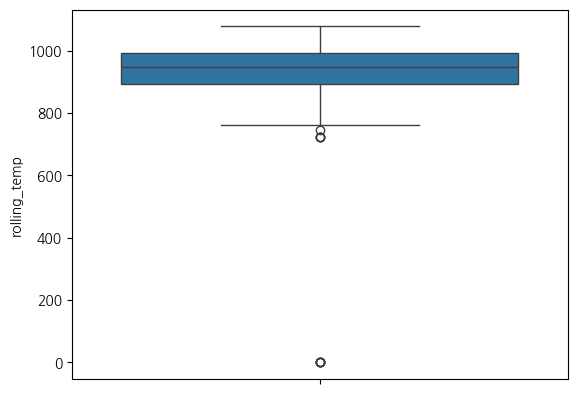

In [4]:
sns.boxplot(y='rolling_temp',data=df_raw)
plt.show()

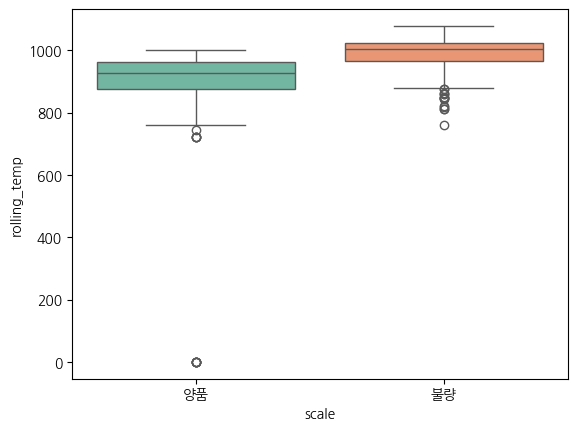

In [5]:
sns.boxplot(x='scale', y='rolling_temp', data=df_raw, palette='Set2')
plt.show()



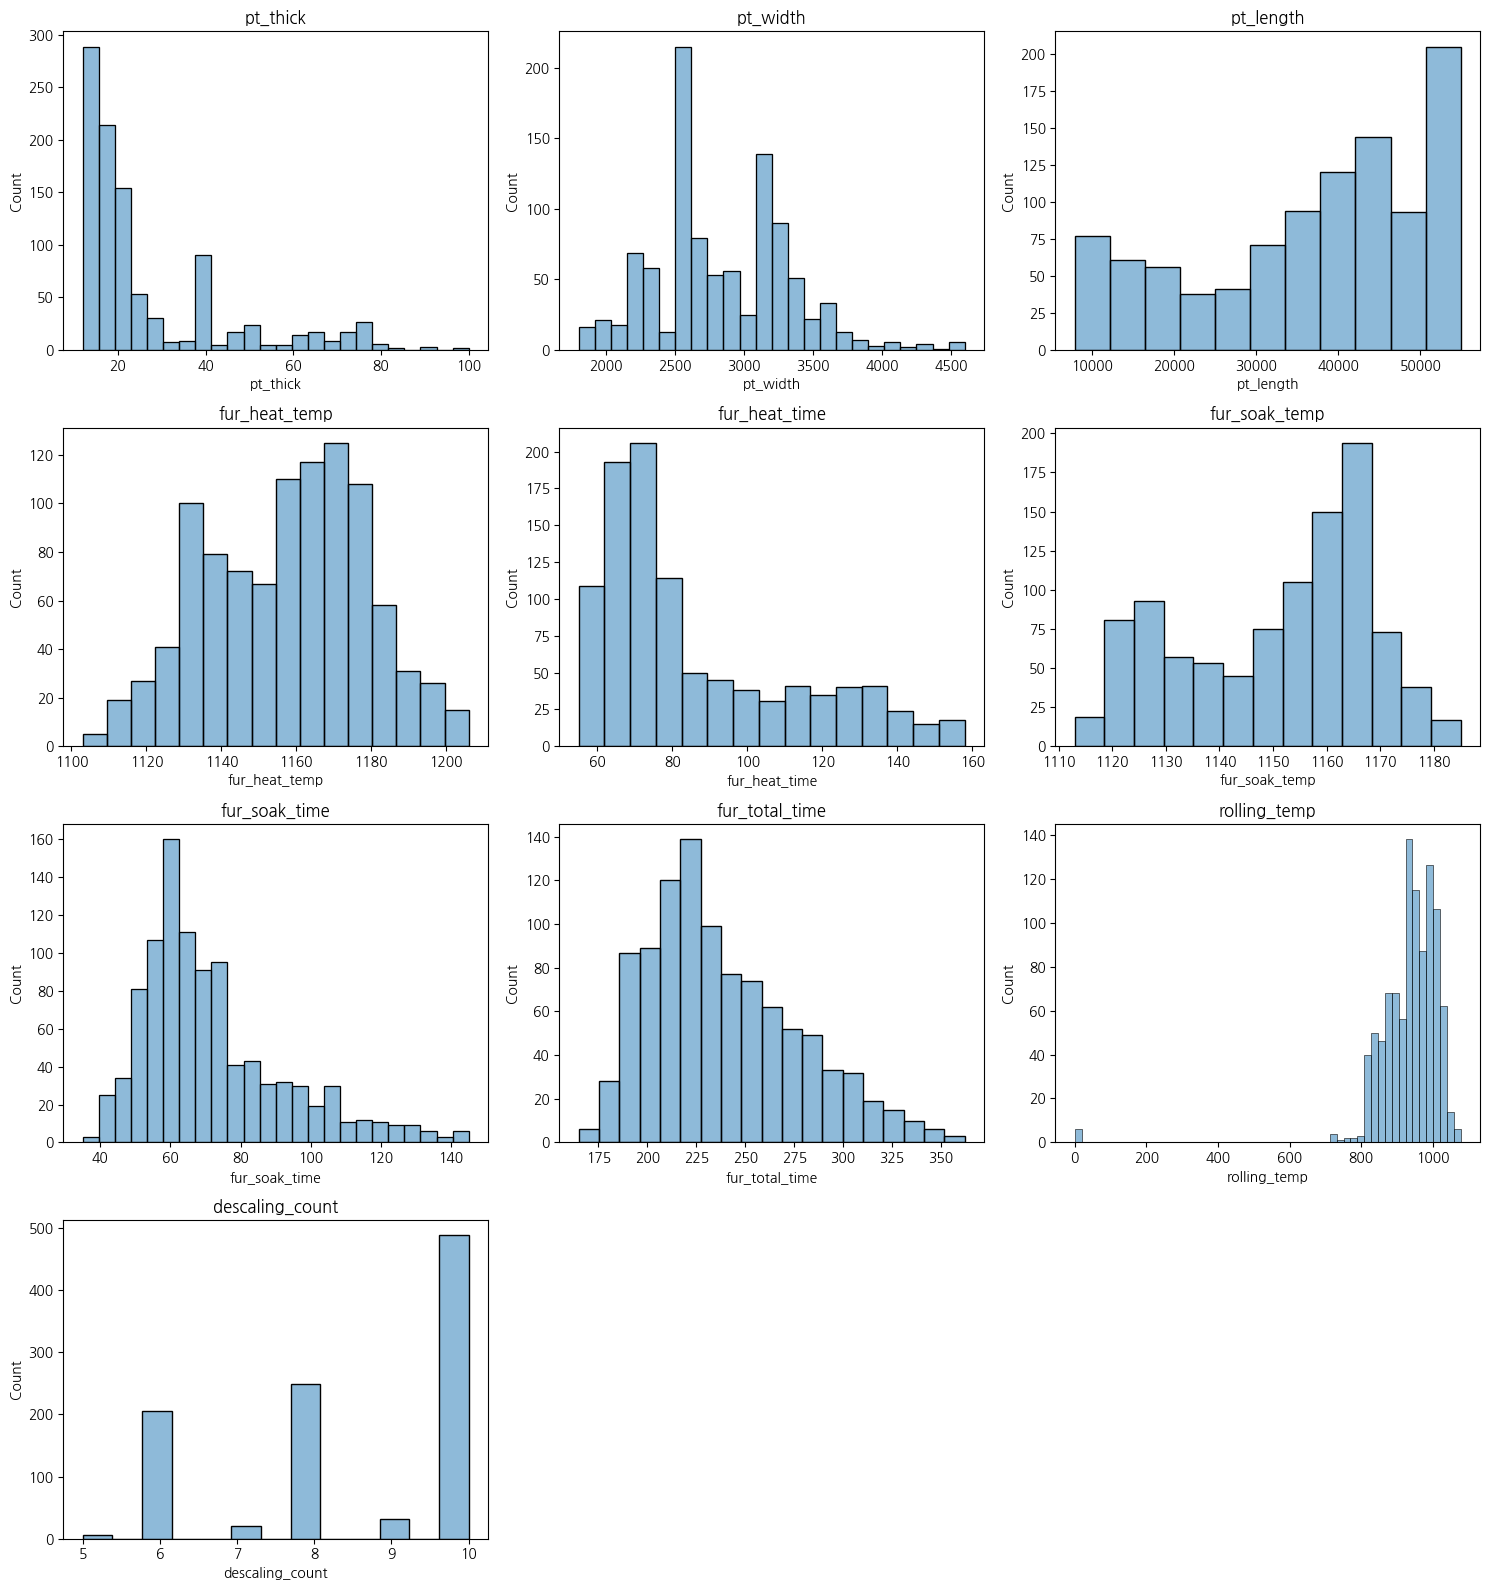

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÏàòÏπòÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù (scale Ï†úÏô∏)
numeric_cols = df_raw.select_dtypes(include='number').columns

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï
n_cols = 3  # Ìïú Ï§ÑÏóê Í∑∏Î¶¥ Í∑∏ÎûòÌîÑ Ïàò
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(data=df_raw, x=col, multiple='layer', alpha=0.5)
    plt.title(col)

plt.tight_layout()
plt.show()


In [7]:
df_raw

plate_no        rolling_date scale   spec_long spec_country steel_kind  \
0    PLT_1001  03JAN2023:07:07:53    ÏñëÌíà  AB/EH32-TM           ÎØ∏Íµ≠          T   
1    PLT_1002  03JAN2023:07:21:22    ÏñëÌíà  AB/EH32-TM           ÎØ∏Íµ≠          T   
2    PLT_1003  03JAN2023:07:31:15    ÏñëÌíà   NV-E36-TM           ÏòÅÍµ≠          T   
3    PLT_1004  03JAN2023:07:41:01    ÏñëÌíà   NV-E36-TM           ÏòÅÍµ≠          T   
4    PLT_1005  03JAN2023:07:52:40    ÏñëÌíà  BV-EH36-TM          ÌîÑÎûëÏä§          T   
..        ...                 ...   ...         ...          ...        ...   
995  PLT_1996  10JAN2023:05:32:25    ÏñëÌíà        BV-A          ÌîÑÎûëÏä§          C   
996  PLT_1997  10JAN2023:05:39:19    ÏñëÌíà        LR-A           ÏòÅÍµ≠          C   
997  PLT_1998  10JAN2023:05:52:41    ÏñëÌíà     AB/AH32           ÎØ∏Íµ≠          C   
998  PLT_1999  10JAN2023:06:01:50    ÏñëÌíà      NV-A32           ÏòÅÍµ≠          C   
999  PLT_2000  10JAN2023:06:16:27    ÏñëÌíà      GL-A32           ÎèÖÏùº          C   

     pt_thick  pt_width  pt_length hsb  ... fur_input_row fur_heat_temp  \
0          32      3700      15100  Ï†ÅÏö©  ...            1Ïó¥          1144   
1          32      3700      15100  Ï†ÅÏö©  ...            2Ïó¥          1144   
2          33      3600      19200  Ï†ÅÏö©  ...            1Ïó¥          1129   
3          33      3600      19200  Ï†ÅÏö©  ...            2Ïó¥          1152   
4          38      3100      13300  Ï†ÅÏö©  ...            1Ïó¥          1140   
..        ...       ...        ...  ..  ...           ...           ...   
995        19      3400      41500  Ï†ÅÏö©  ...            2Ïó¥          1142   
996        19      3400      41500  Ï†ÅÏö©  ...            2Ïó¥          1142   
997        17      3400      43700  Ï†ÅÏö©  ...            2Ïó¥          1169   
998        17      3400      43700  Ï†ÅÏö©  ...            2Ïó¥          1169   
999        16      3400      54200  Ï†ÅÏö©  ...            1Ïó¥          1186   

     fur_heat_time  fur_soak_temp  fur_soak_time  fur_total_time  \
0              116           1133             59             259   
1              122           1135             53             238   
2              116           1121             55             258   
3              125           1127             68             266   
4              134           1128             48             246   
..             ...            ...            ...             ...   
995             55           1151             86             203   
996             55           1151             86             209   
997             65           1163             77             227   
998             65           1163             77             204   
999             82           1169             45             208   

     rolling_method rolling_temp  descaling_count  work_group  
0        TMCP(Ïò®ÎèÑÏ†úÏñ¥)          934                8          1Ï°∞  
1        TMCP(Ïò®ÎèÑÏ†úÏñ¥)          937                8          1Ï°∞  
2        TMCP(Ïò®ÎèÑÏ†úÏñ¥)          889                8          1Ï°∞  
3        TMCP(Ïò®ÎèÑÏ†úÏñ¥)          885                8          1Ï°∞  
4        TMCP(Ïò®ÎèÑÏ†úÏñ¥)          873                8          1Ï°∞  
..              ...          ...              ...         ...  
995        CR(Ï†úÏñ¥ÏïïÏó∞)          948               10          4Ï°∞  
996        CR(Ï†úÏñ¥ÏïïÏó∞)          948               10          4Ï°∞  
997        CR(Ï†úÏñ¥ÏïïÏó∞)          948               10          4Ï°∞  
998        CR(Ï†úÏñ¥ÏïïÏó∞)          948               10          4Ï°∞  
999        CR(Ï†úÏñ¥ÏïïÏó∞)          957               10          4Ï°∞  

[1000 rows x 21 columns]

In [8]:
# scale Ïù∏ÏΩîÎî©

# Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò: ÏñëÌíà = 0, Î∂àÎüâ = 1
df_raw['scale'] = df_raw['scale'].map({'ÏñëÌíà': 0, 'Î∂àÎüâ': 1})


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   int64 
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

## 1. Ïù¥ÏÉÅÏπò + Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

## 1-1. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Î•º ÏúÑÌïú ÏãúÍ∞ÅÌôî(Ïó∞ÏÜçÌòï)

In [10]:
sns.boxplot(x='scale', y='pt_thick', data=df_raw)

<Axes: xlabel='scale', ylabel='pt_thick'>

In [11]:
sns.boxplot(x='scale', y='pt_width', data=df_raw)

<Axes: xlabel='scale', ylabel='pt_thick'>

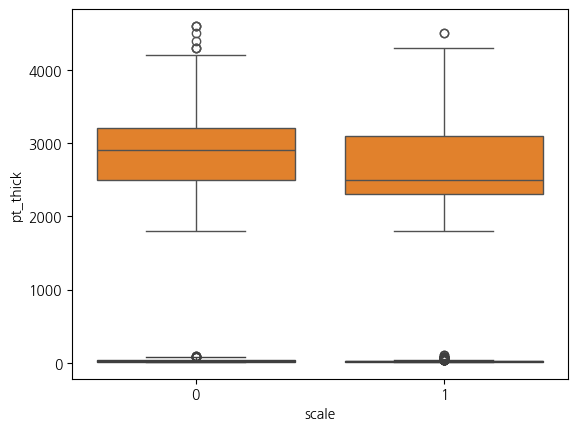

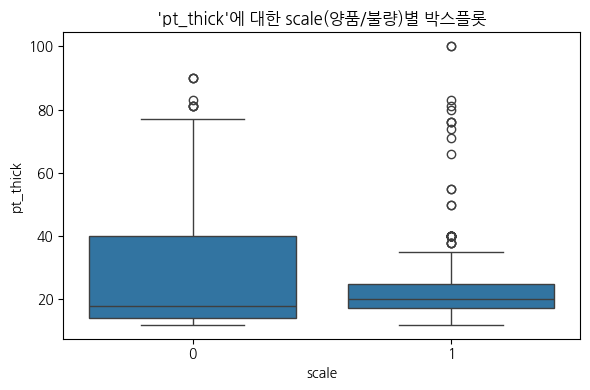

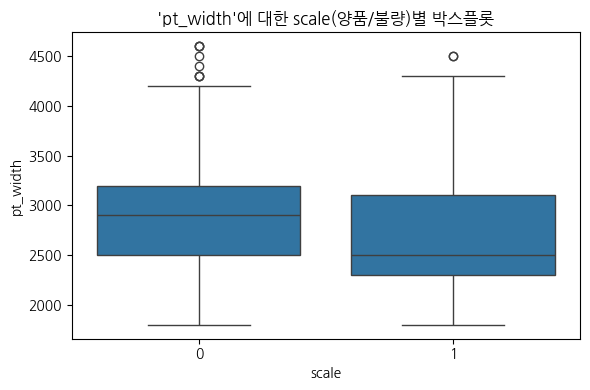

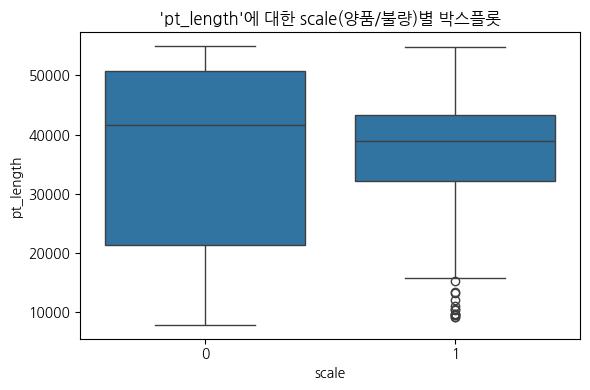

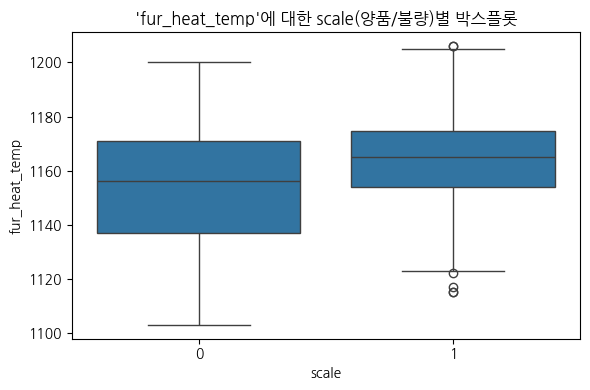

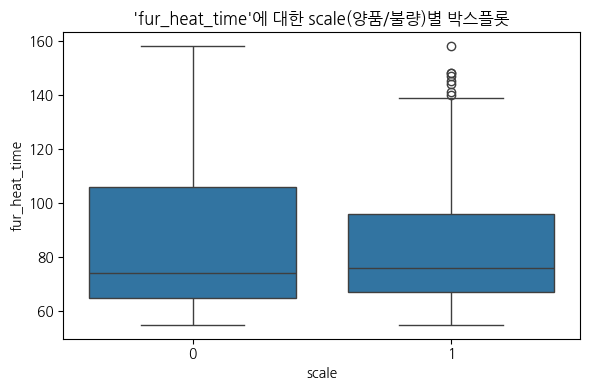

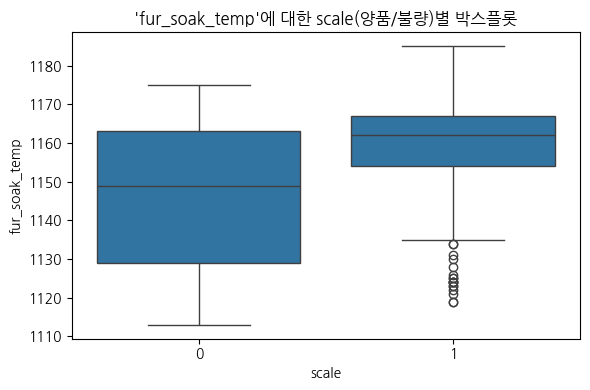

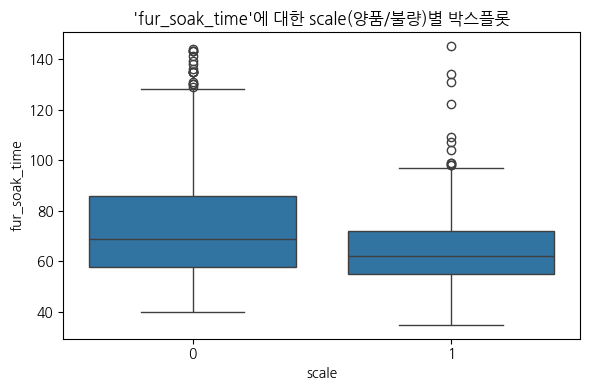

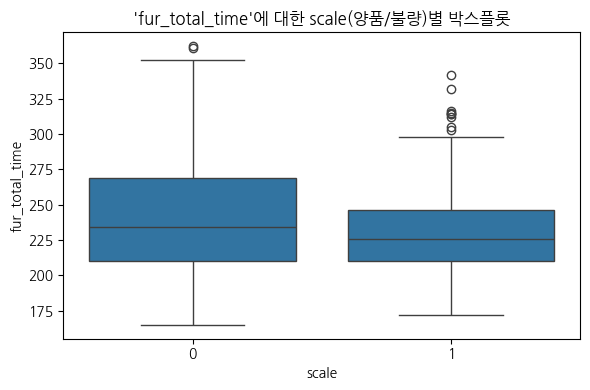

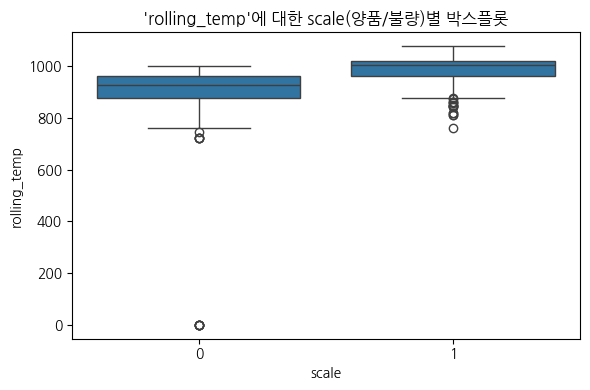

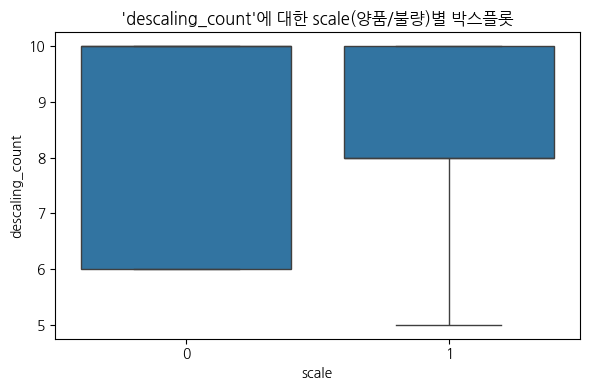

In [12]:
# scaleÏùÑ Î¨∏ÏûêÏó¥Î°ú Î™ÖÌôïÌûà Ï≤òÎ¶¨
df_raw['scale'] = df_raw['scale'].astype(str)

# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå Í≥®ÎùºÎÇ¥Í∏∞ (pt_thickÏ≤òÎüº ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏãúÍ∞ÅÌôî ÎåÄÏÉÅ)
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

# Î∞òÎ≥µÎ¨∏ÏúºÎ°ú Í∞Å ÏàòÏπòÌòï Î≥ÄÏàòÎ≥Ñ boxplot ÏÉùÏÑ±
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='scale', y=col, data=df_raw)
    plt.title(f"'{col}'Ïóê ÎåÄÌïú scale(ÏñëÌíà/Î∂àÎüâ)Î≥Ñ Î∞ïÏä§ÌîåÎ°Ø")
    plt.xlabel('scale')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Î°§ÎßÅÌÖúÌçº 0Ïù∏Ïï†Îì§ 6Í∞ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞

In [13]:
# rolling_tempÍ∞Ä 0Ïù∏ Ìñâ Ï†úÍ±∞
df_raw = df_raw[df_raw['rolling_temp'] != 0].copy()


In [14]:
df_raw[df_raw["rolling_temp"] == 0]

Empty DataFrame
Columns: [plate_no, rolling_date, scale, spec_long, spec_country, steel_kind, pt_thick, pt_width, pt_length, hsb, fur_no, fur_input_row, fur_heat_temp, fur_heat_time, fur_soak_temp, fur_soak_time, fur_total_time, rolling_method, rolling_temp, descaling_count, work_group]
Index: []

[0 rows x 21 columns]

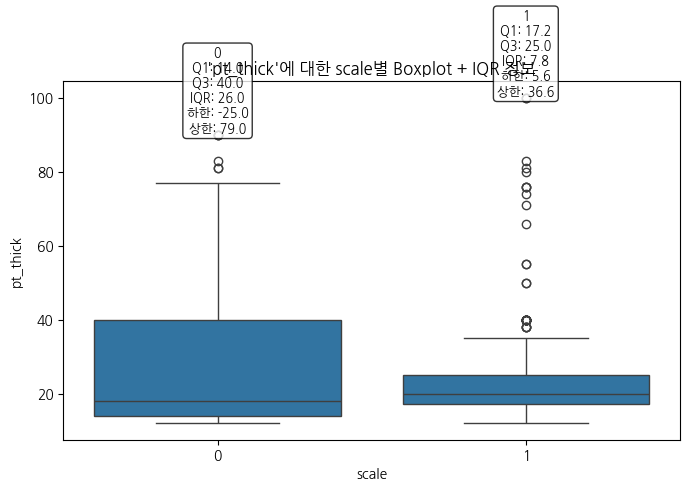

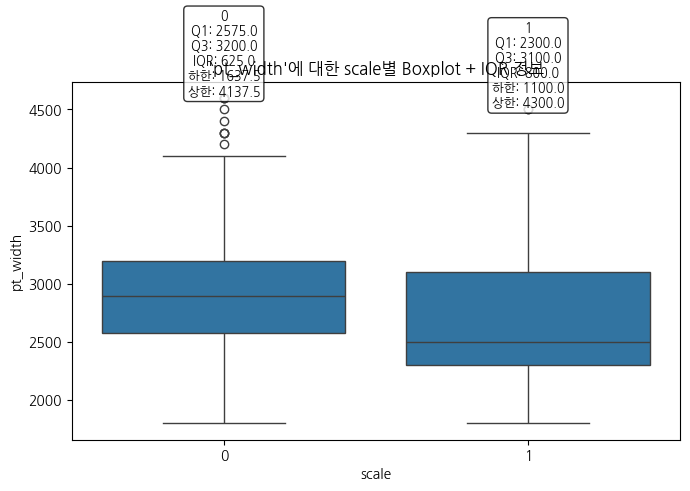

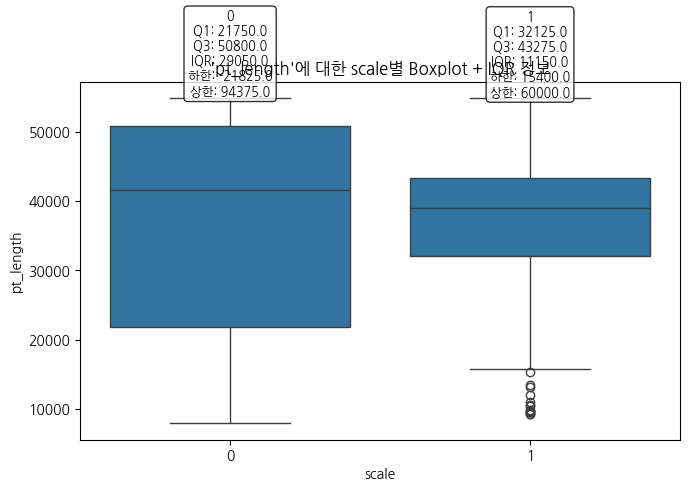

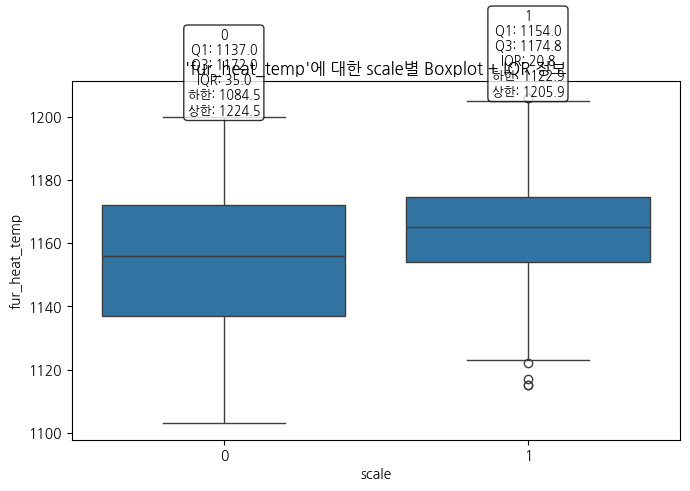

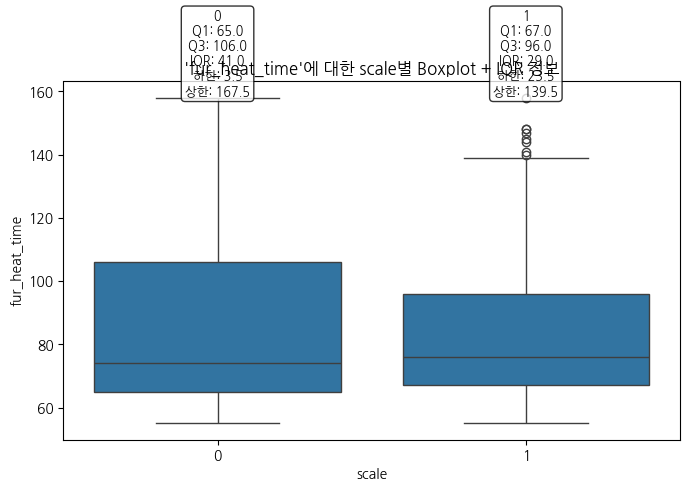

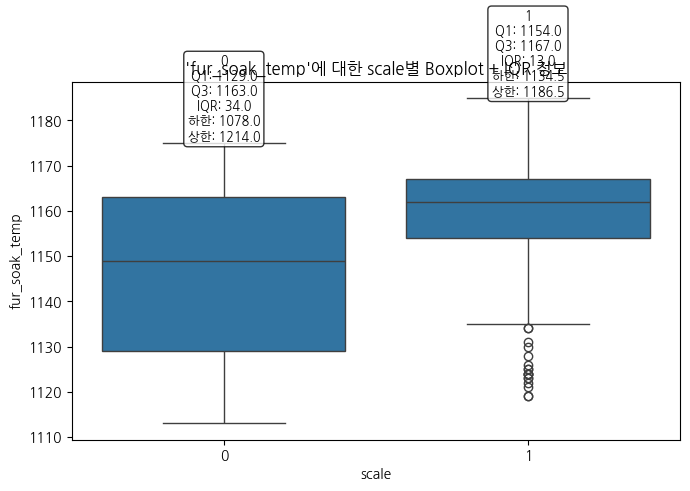

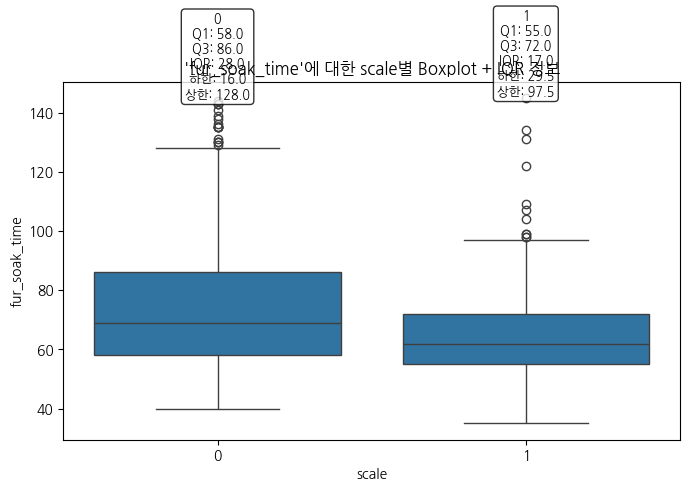

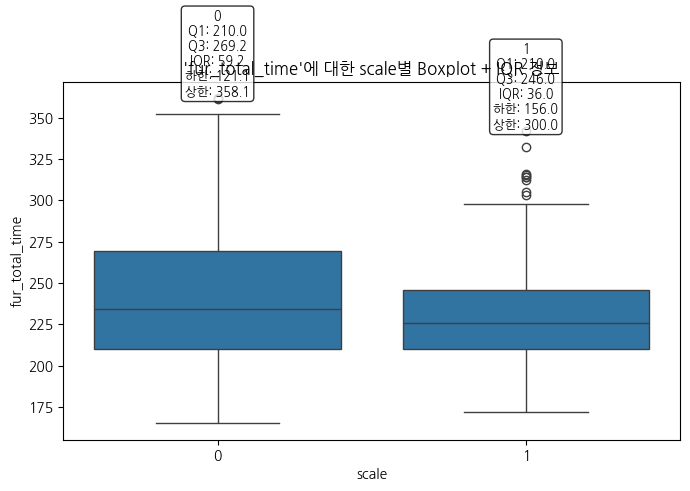

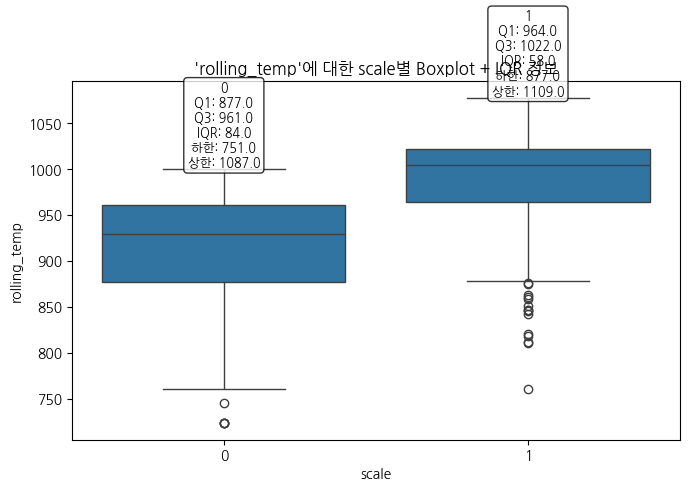

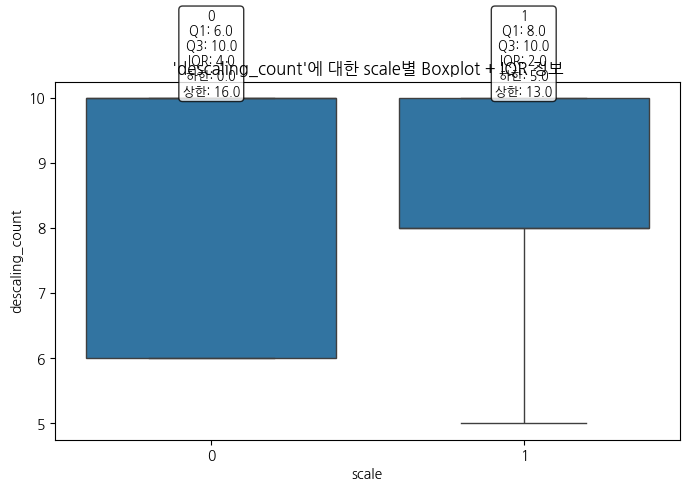

In [15]:
# scaleÏùÑ Î¨∏ÏûêÏó¥Î°ú Ï≤òÎ¶¨
df_raw['scale'] = df_raw['scale'].astype(str)

# ÏàòÏπòÌòï Î≥ÄÏàò Ï∂îÏ∂ú
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns
category_values = df_raw['scale'].unique()

# Î∞òÎ≥µÎ¨∏
for col in numeric_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.boxplot(x='scale', y=col, data=df_raw)
    plt.title(f"'{col}'Ïóê ÎåÄÌïú scaleÎ≥Ñ Boxplot + IQR Ï†ïÎ≥¥")
    plt.xlabel('scale')
    plt.ylabel(col)

    for i, category in enumerate(category_values):
        group = df_raw[df_raw['scale'] == category][col]
        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        text = f"{category}\nQ1: {Q1:.1f}\nQ3: {Q3:.1f}\nIQR: {IQR:.1f}\nÌïòÌïú: {lower:.1f}\nÏÉÅÌïú: {upper:.1f}"

        ax.text(x=i, y=group.max(), s=text,
                ha='center', va='bottom', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

    plt.tight_layout()
    plt.show()


## 1-2. Ïù¥ÏÉÅÏπò? Ï≤òÎ¶¨Î•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏(Î≤îÏ£ºÌòï)

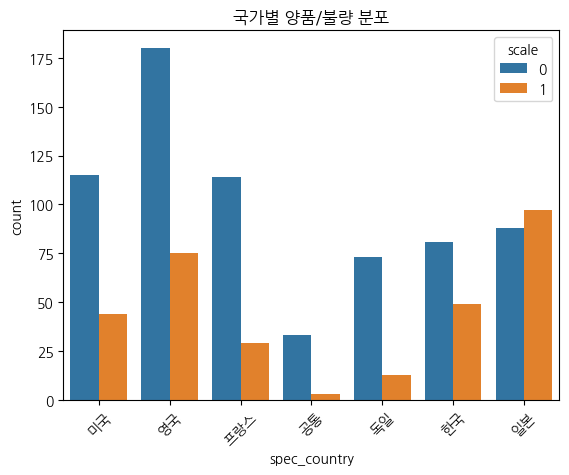

In [16]:
sns.countplot(data=df_raw, x='spec_country', hue='scale')
plt.title('Íµ≠Í∞ÄÎ≥Ñ ÏñëÌíà/Î∂àÎüâ Î∂ÑÌè¨')
plt.xticks(rotation=45)
plt.show()

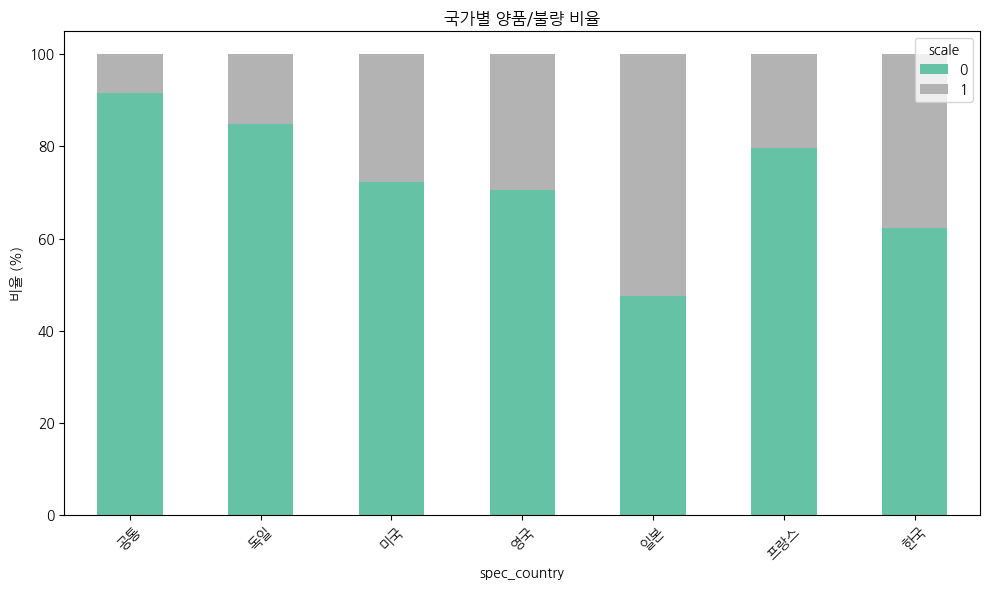

In [17]:
pd.crosstab(df_raw['spec_country'], df_raw['scale'], normalize='index') * 100

ct = pd.crosstab(df_raw['spec_country'], df_raw['scale'], normalize='index') * 100

# ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.ylabel('ÎπÑÏú® (%)')
plt.title('Íµ≠Í∞ÄÎ≥Ñ ÏñëÌíà/Î∂àÎüâ ÎπÑÏú®')
plt.legend(title='scale', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:


# scaleÏùÑ Î¨∏ÏûêÏó¥Î°ú Î™ÖÌôïÌûà ÏÑ§Ï†ï
df_raw['scale'] = df_raw['scale'].astype(str)

# Î≤îÏ£ºÌòï Ïª¨Îüº Ï∂îÏ∂ú (object ÎòêÎäî category ÌÉÄÏûÖ)
categorical_cols = df_raw.select_dtypes(include=['object', 'category']).columns.tolist()

# Î™©ÌëúÎ≥ÄÏàò Ï†úÏô∏ (scaleÏùÄ targetÏù¥ÎØÄÎ°ú)
categorical_cols = [col for col in categorical_cols if col != 'scale']

# Î∞òÎ≥µÎ¨∏ÏúºÎ°ú countplot + stacked bar plot Í∑∏Î¶¨Í∏∞
for col in categorical_cols:
    print(f"üìä [{col}] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...")

    # COUNT PLOT
    
    # plt.figure(figsize=(8, 4))
    # sns.countplot(data=df_raw, x=col, hue='scale')
    # plt.title(f'Countplot - {col} vs scale')
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

    # STACKED BAR PLOT

    # ctab = pd.crosstab(df_raw[col], df_raw['scale'], normalize='index') * 100
    # ctab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
    # plt.title(f'Stacked Barplot - {col} vs scale (%)')
    # plt.ylabel('ÎπÑÏú® (%)')
    # plt.xticks(rotation=45)
    # plt.legend(title='scale')
    # plt.tight_layout()
    # plt.show()


üìä [plate_no] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [rolling_date] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [spec_long] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [spec_country] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [steel_kind] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [hsb] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [fur_no] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [fur_input_row] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [rolling_method] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...
üìä [work_group] vs [scale] ÏãúÍ∞ÅÌôî Ï§ë...


## 1-3 scale Ïù∏ÏΩîÎî©

In [19]:
# scale(ÏñëÌíà/Î∂àÎüâ) ÏõêÌï´ Ïù∏ÏΩîÎî©(drop_first)
df_raw_dummy = pd.get_dummies(df_raw, columns=['scale'], drop_first=True)

In [20]:
df_raw_dummy.head()

plate_no        rolling_date   spec_long spec_country steel_kind  pt_thick  \
0  PLT_1001  03JAN2023:07:07:53  AB/EH32-TM           ÎØ∏Íµ≠          T        32   
1  PLT_1002  03JAN2023:07:21:22  AB/EH32-TM           ÎØ∏Íµ≠          T        32   
2  PLT_1003  03JAN2023:07:31:15   NV-E36-TM           ÏòÅÍµ≠          T        33   
3  PLT_1004  03JAN2023:07:41:01   NV-E36-TM           ÏòÅÍµ≠          T        33   
4  PLT_1005  03JAN2023:07:52:40  BV-EH36-TM          ÌîÑÎûëÏä§          T        38   

   pt_width  pt_length hsb fur_no  ... fur_heat_temp  fur_heat_time  \
0      3700      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...          1144            116   
1      3700      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...          1144            122   
2      3600      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...          1129            116   
3      3600      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...          1152            125   
4      3100      13300  Ï†ÅÏö©    3Ìò∏Í∏∞  ...          1140            134   

   fur_soak_temp  fur_soak_time  fur_total_time  rolling_method rolling_temp  \
0           1133             59             259      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          934   
1           1135             53             238      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          937   
2           1121             55             258      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          889   
3           1127             68             266      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          885   
4           1128             48             246      TMCP(Ïò®ÎèÑÏ†úÏñ¥)          873   

   descaling_count  work_group scale_1  
0                8          1Ï°∞   False  
1                8          1Ï°∞   False  
2                8          1Ï°∞   False  
3                8          1Ï°∞   False  
4                8          1Ï°∞   False  

[5 rows x 21 columns]

# 2. ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±, ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≤ÄÏ†ï

In [21]:
# df_grouped = df_raw.groupby('hsb')['scale'].mean().reset_index()
# df_grouped.columns = ['hsb', 'Î∂àÎüâÎ•†']

In [22]:
# sns.barplot(x='hsb', y='Î∂àÎüâÎ•†', data=df_grouped, palette='Blues')
# plt.title('HSB Ï†ÅÏö© Ïó¨Î∂ÄÏóê Îî∞Î•∏ Î∂àÎüâÎ•†')
# plt.ylabel('Î∂àÎüâÎ•† (scale=1 ÎπÑÏú®)')
# plt.xlabel('HSB Ï†ÅÏö© Ïó¨Î∂Ä')
# plt.ylim(0, 1)  # ÎπÑÏú®Ïù¥ÎãàÍπå 0~1Î°ú Í≥†Ï†ï
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

## 2-1. rolling date ÎÇ†Ïßú Î∂ÑÎ¶¨?

In [23]:
# 1.ÎÇ†ÏßúÌòïÏúºÎ°ú Î∞îÍæ∏Îäî ÏΩîÎìú

df_raw["rolling_date"] = df_raw["rolling_date"].astype(str).str.strip().str.upper()

df_raw["rolling_date"] = pd.to_datetime(df_raw["rolling_date"], format="%d%b%Y:%H:%M:%S", errors="coerce")

df_raw["day"] = df_raw["rolling_date"].dt.day           # ÎÇ†ÏßúÎßå Ï∂îÏ∂ú
df_raw["hour"] = df_raw["rolling_date"].dt.hour           # Ïãú(hour)
df_raw["minute"] = df_raw["rolling_date"].dt.minute       # Î∂Ñ(minute)
df_raw["weekday"] = df_raw["rolling_date"].dt.day_name()  # ÏöîÏùº Ïù¥Î¶Ñ

# ÏöîÏùºÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò (ÏõîÏöîÏùº=0, ÌôîÏöîÏùº=1, ..., ÏùºÏöîÏùº=6)

df_raw["weekday_number"] = df_raw["rolling_date"].dt.weekday

# Í≤∞Í≥º ÌôïÏù∏

df_raw.head()



plate_no        rolling_date scale   spec_long spec_country steel_kind  \
0  PLT_1001 2023-01-03 07:07:53     0  AB/EH32-TM           ÎØ∏Íµ≠          T   
1  PLT_1002 2023-01-03 07:21:22     0  AB/EH32-TM           ÎØ∏Íµ≠          T   
2  PLT_1003 2023-01-03 07:31:15     0   NV-E36-TM           ÏòÅÍµ≠          T   
3  PLT_1004 2023-01-03 07:41:01     0   NV-E36-TM           ÏòÅÍµ≠          T   
4  PLT_1005 2023-01-03 07:52:40     0  BV-EH36-TM          ÌîÑÎûëÏä§          T   

   pt_thick  pt_width  pt_length hsb  ... fur_total_time rolling_method  \
0        32      3700      15100  Ï†ÅÏö©  ...            259     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
1        32      3700      15100  Ï†ÅÏö©  ...            238     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
2        33      3600      19200  Ï†ÅÏö©  ...            258     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
3        33      3600      19200  Ï†ÅÏö©  ...            266     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
4        38      3100      13300  Ï†ÅÏö©  ...            246     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   

   rolling_temp  descaling_count  work_group  day  hour minute  weekday  \
0           934                8          1Ï°∞    3     7      7  Tuesday   
1           937                8          1Ï°∞    3     7     21  Tuesday   
2           889                8          1Ï°∞    3     7     31  Tuesday   
3           885                8          1Ï°∞    3     7     41  Tuesday   
4           873                8          1Ï°∞    3     7     52  Tuesday   

   weekday_number  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 26 columns]

In [24]:
# weekday Ïª¨Îüº(ÏöîÏùº) Ï†úÍ±∞

df_raw.drop('weekday', axis= 1,inplace=True)

In [25]:
# rolling_date Ïª¨Îüº Ï†úÍ±∞

df_raw.drop('rolling_date', axis= 1,inplace=True)

In [26]:
df_raw.head()

plate_no scale   spec_long spec_country steel_kind  pt_thick  pt_width  \
0  PLT_1001     0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
1  PLT_1002     0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
2  PLT_1003     0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
3  PLT_1004     0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
4  PLT_1005     0  BV-EH36-TM          ÌîÑÎûëÏä§          T        38      3100   

   pt_length hsb fur_no  ... fur_soak_time  fur_total_time  rolling_method  \
0      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...            59             259      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
1      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...            53             238      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
2      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...            55             258      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
3      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...            68             266      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
4      13300  Ï†ÅÏö©    3Ìò∏Í∏∞  ...            48             246      TMCP(Ïò®ÎèÑÏ†úÏñ¥)   

   rolling_temp  descaling_count  work_group day  hour  minute weekday_number  
0           934                8          1Ï°∞   3     7       7              1  
1           937                8          1Ï°∞   3     7      21              1  
2           889                8          1Ï°∞   3     7      31              1  
3           885                8          1Ï°∞   3     7      41              1  
4           873                8          1Ï°∞   3     7      52              1  

[5 rows x 24 columns]

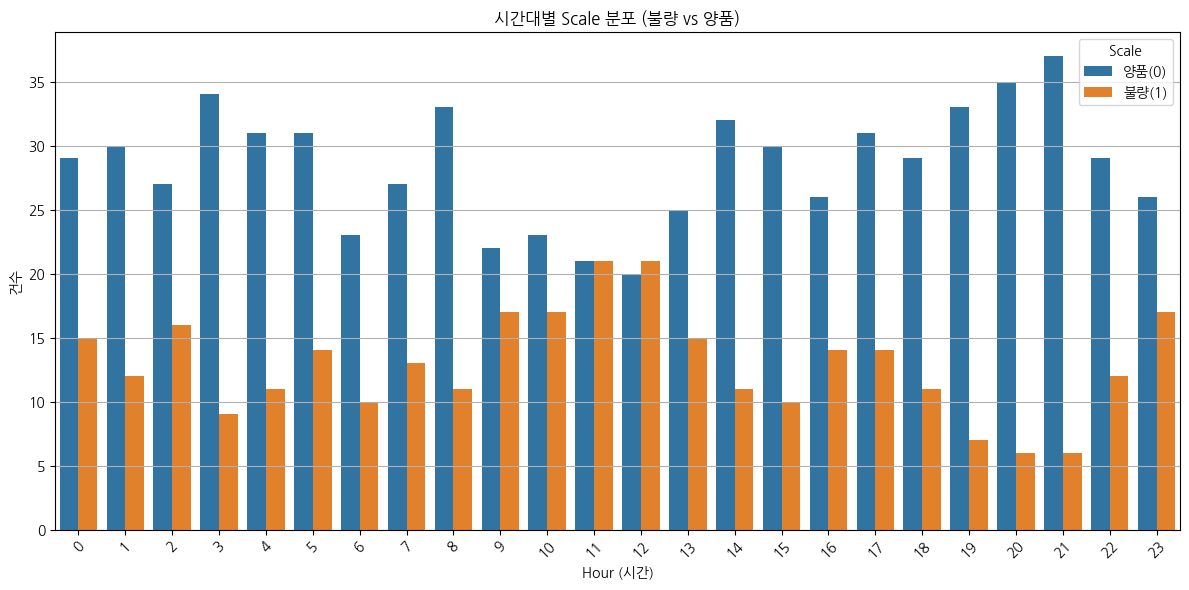

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='scale', data=df_raw)

plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ Scale Î∂ÑÌè¨ (Î∂àÎüâ vs ÏñëÌíà)")
plt.xlabel("Hour (ÏãúÍ∞Ñ)")
plt.ylabel("Í±¥Ïàò")
plt.legend(title='Scale', labels=['ÏñëÌíà(0)', 'Î∂àÎüâ(1)'])
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


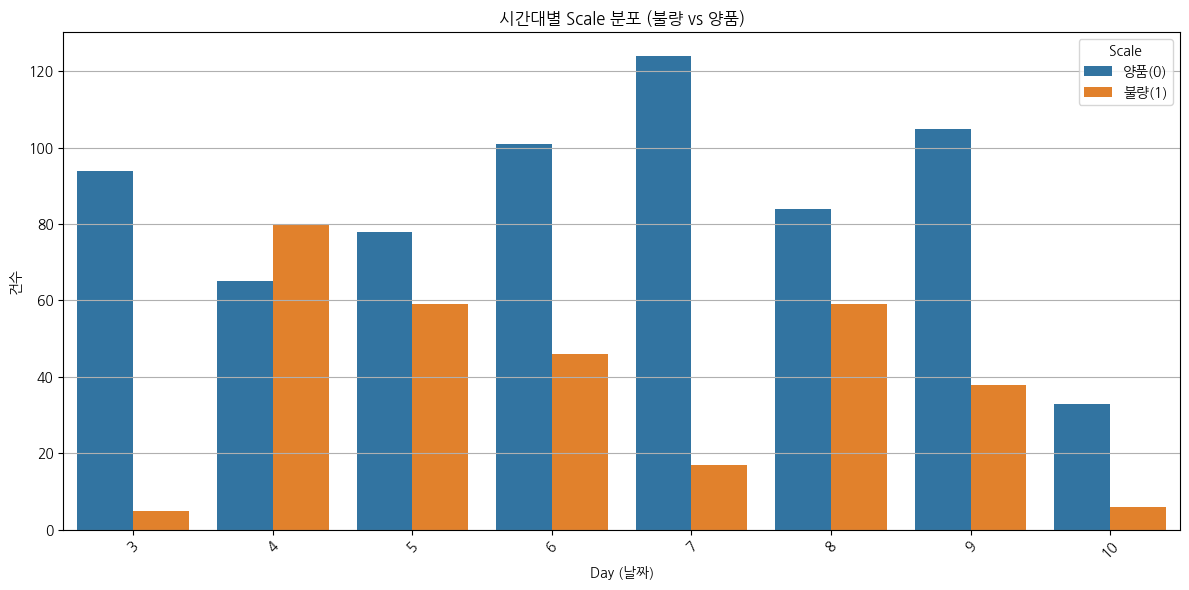

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='scale', data=df_raw)

plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ Scale Î∂ÑÌè¨ (Î∂àÎüâ vs ÏñëÌíà)")
plt.xlabel("Day (ÎÇ†Ïßú)")
plt.ylabel("Í±¥Ïàò")
plt.legend(title='Scale', labels=['ÏñëÌíà(0)', 'Î∂àÎüâ(1)'])
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
df_raw['spec_long'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

## 2-2. Spec_longÏóêÏÑú ÏïûÏóê Îëê Í∏ÄÏûêÎßå Îî∞ÏÑú ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±( ÏÑ†Í∏âÏÇ¨ ÏΩîÎìú Îì±)

In [28]:
# ‚ù∂ ÌõÑÌåê spec Í∏∞Ï§Ä Í≥†Í∞ïÎèÑ, Ï°∞ÏÑ†Ïö©, Ïó¥Ï≤òÎ¶¨ Ïó¨Î∂Ä Îì±ÏùÑ Î∞òÏòÅÌï¥ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

# Ï£ºÏöî ÌÇ§ÏõåÎìú Ï†ïÏùò
high_strength_keywords = ['EH36', 'AH36', 'DH36', 'HSB', 'SM490', 'A516', 'A709']
shipbuilding_keywords = ['EH', 'AH', 'DH', 'CCS', 'LR', 'NK', 'GL', 'AB', 'BV', 'KR']
heat_treatment_keywords = ['TM', 'TL']  # TM: Thermo-Mechanical, TL: Toughness Level

# ‚ù∑ spec_long ‚Üí Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
df_raw['spec_long'] = df_raw['spec_long'].astype(str)

# ‚ù∏ Í≥†Í∞ïÎèÑ Ïû¨Ïßà Ïó¨Î∂Ä
df_raw['is_high_strength'] = df_raw['spec_long'].apply(
    lambda x: any(kw in x for kw in high_strength_keywords)
)

# ‚ùπ Ï°∞ÏÑ†Ïö© Ïû¨Ïßà Ïó¨Î∂Ä
df_raw['is_ship_steel'] = df_raw['spec_long'].apply(
    lambda x: any(kw in x for kw in shipbuilding_keywords)
)

# ‚ù∫ Ïó¥Ï≤òÎ¶¨ Î∞©Ïãù (TM / TL / ÏóÜÏùå) ‚Üí Îã§Ï§ë ÌÅ¥ÎûòÏä§
def extract_heat_treatment(x):
    for ht in heat_treatment_keywords:
        if ht in x:
            return ht
    return 'None'

df_raw['heat_treatment_type'] = df_raw['spec_long'].apply(extract_heat_treatment)

# ‚ùª Í∞ïÏ¢Ö ÏΩîÎìúÎßå Ï∂îÏ∂ú (Ïòà: SM490, EH36 Îì±)
import re
df_raw['spec_grade'] = df_raw['spec_long'].apply(
    lambda x: re.findall(r'[A-Z]{2,4}\-?\d{2,3}', x)[-1] if re.findall(r'[A-Z]{2,4}\-?\d{2,3}', x) else 'UNKNOWN'
)


### ***scale, steel_kind, hsb Îì± Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî ÏãúÍ∞ÅÌôî Ï†ÑÏóê 0:1Î°ú Îß§ÌïëÌïòÍ∏∞

In [29]:
df_raw.head() # Í∏∞Ï°¥Ïùò spec_longÏùÄ ÏùºÎã® ÎìúÎûçÌïòÏßÄ ÏïäÍ≥† Ïú†ÏßÄÌïòÎäî Í±∏Î°ú ... (Ï†ÑÎ¨∏Í∞ÄÎì§ÏóêÍ≤åÎäî Í∑∏ ÏûêÏ≤¥Í∞Ä Îçî ÏßÅÍ¥ÄÏ†ÅÏùº Ïàò ÏûàÏùå, Ï∂îÌõÑ ÎßàÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Í∞ÄÎä•ÏÑ±)

plate_no scale   spec_long spec_country steel_kind  pt_thick  pt_width  \
0  PLT_1001     0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
1  PLT_1002     0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
2  PLT_1003     0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
3  PLT_1004     0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
4  PLT_1005     0  BV-EH36-TM          ÌîÑÎûëÏä§          T        38      3100   

   pt_length hsb fur_no  ... descaling_count  work_group  day  hour  minute  \
0      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...               8          1Ï°∞    3     7       7   
1      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...               8          1Ï°∞    3     7      21   
2      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...               8          1Ï°∞    3     7      31   
3      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...               8          1Ï°∞    3     7      41   
4      13300  Ï†ÅÏö©    3Ìò∏Í∏∞  ...               8          1Ï°∞    3     7      52   

   weekday_number is_high_strength  is_ship_steel  heat_treatment_type  \
0               1            False           True                   TM   
1               1            False           True                   TM   
2               1            False          False                   TM   
3               1            False          False                   TM   
4               1             True           True                   TM   

  spec_grade  
0       EH32  
1       EH32  
2    UNKNOWN  
3    UNKNOWN  
4       EH36  

[5 rows x 28 columns]

In [30]:
df_raw.columns

Index(['plate_no', 'scale', 'spec_long', 'spec_country', 'steel_kind',
       'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'rolling_method', 'rolling_temp', 'descaling_count',
       'work_group', 'day', 'hour', 'minute', 'weekday_number',
       'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
       'spec_grade'],
      dtype='object')

### üìä ÏãúÍ∞ÅÌôî: Î™©Ìëú Í∑∏ÎûòÌîÑ ÌòïÌÉú
xÏ∂ï: Í∑∏Î£π Ïù¥Î¶Ñ (heat_temp_high, soak_temp_high, both_high)

yÏ∂ï: Î∂àÎüâÎ•† (0~1)

Í∞Å ÎßâÎåÄ: 1150ÎèÑ Ïù¥ÏÉÅÏùº ÎïåÏùò Í∑∏Î£π vs ÎØ∏Îßå Í∑∏Î£π ‚Üí ÎπÑÍµêÏö©

### 2-3. Î™©ÌëúÎ≥ÄÏàò ÏòÅÌñ• Î≥ÄÏàò ÌôïÏù∏

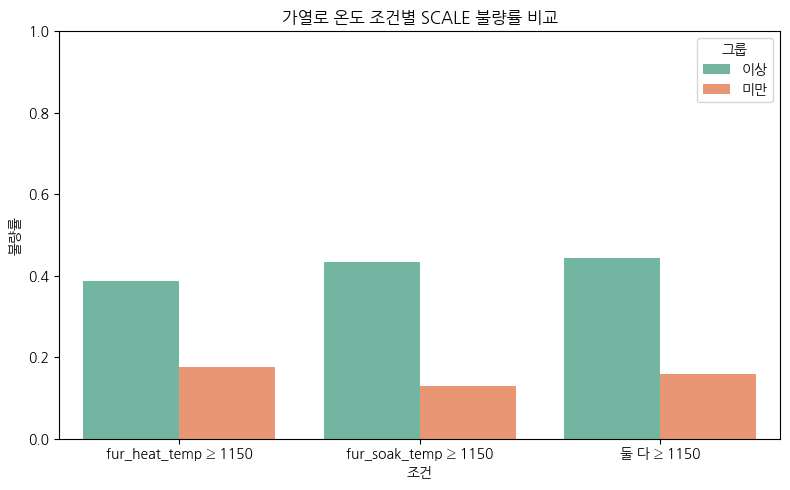

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ï†ÑÏ†ú: scaleÏùÄ 0/1 Í∞íÏù¥Ïñ¥Ïïº Ìï®

# Ï°∞Í±¥Î≥Ñ Í∑∏Î£π ÏÉùÏÑ±
df_raw['scale'] = df_raw['scale'].astype(int)

df_raw['heat_temp_high'] = df_raw['fur_heat_temp'] >= 1150
df_raw['soak_temp_high'] = df_raw['fur_soak_temp'] >= 1150
df_raw['both_temp_high'] = (df_raw['fur_heat_temp'] >= 1150) & (df_raw['fur_soak_temp'] >= 1150)

# Í∑∏Î£πÎ≥Ñ Î∂àÎüâÎ•† Í≥ÑÏÇ∞
summary = pd.DataFrame({
    'Ï°∞Í±¥': ['fur_heat_temp ‚â• 1150', 'fur_soak_temp ‚â• 1150', 'Îëò Îã§ ‚â• 1150'],
    'Ïù¥ÏÉÅ': [
        df_raw[df_raw['heat_temp_high']]['scale'].mean(),
        df_raw[df_raw['soak_temp_high']]['scale'].mean(),
        df_raw[df_raw['both_temp_high']]['scale'].mean()
    ],
    'ÎØ∏Îßå': [
        df_raw[~df_raw['heat_temp_high']]['scale'].mean(),
        df_raw[~df_raw['soak_temp_high']]['scale'].mean(),
        df_raw[~df_raw['both_temp_high']]['scale'].mean()
    ]
})

# meltÎ°ú Î≥ÄÌòïÌïòÏó¨ ÏãúÍ∞ÅÌôî
summary_melted = summary.melt(id_vars='Ï°∞Í±¥', var_name='Í∑∏Î£π', value_name='Î∂àÎüâÎ•†')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.barplot(x='Ï°∞Í±¥', y='Î∂àÎüâÎ•†', hue='Í∑∏Î£π', data=summary_melted, palette='Set2')
plt.title("Í∞ÄÏó¥Î°ú Ïò®ÎèÑ Ï°∞Í±¥Î≥Ñ SCALE Î∂àÎüâÎ•† ÎπÑÍµê")
plt.ylabel("Î∂àÎüâÎ•†")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### ÌååÏÉùÎ≥ÄÏàò: ÎîîÏä§ÏºÄÏùºÎßÅ ÌôÄÏßùÏó¨Î∂Ä, Î°§ÎßÅÌÖúÌçº 1000 Ïù¥ÏÉÅÏù¥Î©¥ Î∂àÎüâ, 

In [32]:
# descaling_count ÌôÄ/ÏßùÏàò Íµ¨Î∂Ñ ‚Üí 'odd' ÎòêÎäî 'even'
df_raw['descaling_parity'] = df_raw['descaling_count'].apply(
    lambda x: 'odd' if x % 2 == 1 else 'even')
### ÌôÄÏàòÏù¥Î©¥ Î∂àÎüâÎ•†Ïù¥ ÎÜíÏùÄÍ∞Ä? ÏôÄ Í∞ôÏùÄ Í∞ÄÏÑ§ÏùÄ Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï

### rolling_tempÎ•º 1000 Í∏∞Ï§ÄÏúºÎ°ú 'high' / 'low' , Î∂àÎüâÎ•† ÏãúÍ∞ÅÌôî

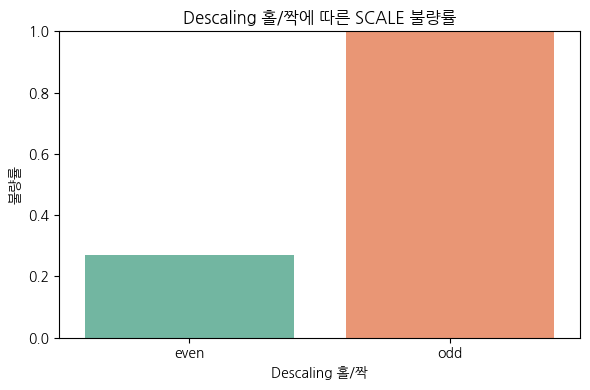

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î∂àÎüâÎ•† Í≥ÑÏÇ∞: ÌôÄÏßù Í∏∞Ï§Ä
summary = df_raw.groupby('descaling_parity')['scale'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
sns.barplot(x='descaling_parity', y='scale', data=summary, palette='Set2')
plt.title('Descaling ÌôÄ/ÏßùÏóê Îî∞Î•∏ SCALE Î∂àÎüâÎ•†')
plt.xlabel('Descaling ÌôÄ/Ïßù')
plt.ylabel('Î∂àÎüâÎ•†')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [34]:
# rolling_tempÎ•º 1000 Í∏∞Ï§ÄÏúºÎ°ú 'high' / 'low' Î≤îÏ£º ÏÉùÏÑ±
df_raw['rolling_temp_1000'] = df_raw['rolling_temp'].apply(
    lambda x: 'high' if x >= 1000 else 'low'
)


### rolling_tempÎ•º 1000 Í∏∞Ï§ÄÏúºÎ°ú 'high' / 'low' , Î∂àÎüâÎ•† ÏãúÍ∞ÅÌôî

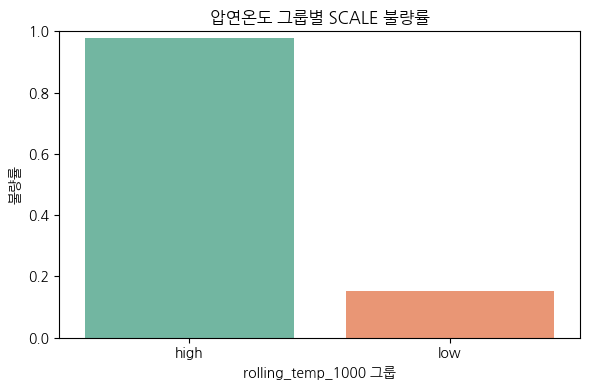

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# rolling_temp_1000 Í∞íÏù¥ 'low', 'middle' Îì±Ïùò Î≤îÏ£ºÎùºÍ≥† Í∞ÄÏ†ï
# scaleÏùÄ 0=ÏñëÌíà, 1=Î∂àÎüâ Ïù¥ÏßÑÍ∞íÏúºÎ°ú Ï°¥Ïû¨Ìï¥Ïïº Ìï®

# Î≤îÏ£ºÎ≥Ñ Î∂àÎüâÎ•† Í≥ÑÏÇ∞
summary = df_raw.groupby('rolling_temp_1000')['scale'].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
sns.barplot(x='rolling_temp_1000', y='scale', data=summary, palette='Set2')
plt.title("ÏïïÏó∞Ïò®ÎèÑ Í∑∏Î£πÎ≥Ñ SCALE Î∂àÎüâÎ•†")
plt.xlabel("rolling_temp_1000 Í∑∏Î£π")
plt.ylabel("Î∂àÎüâÎ•†")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [36]:
df_raw.head()

plate_no  scale   spec_long spec_country steel_kind  pt_thick  pt_width  \
0  PLT_1001      0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
1  PLT_1002      0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
2  PLT_1003      0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
3  PLT_1004      0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
4  PLT_1005      0  BV-EH36-TM          ÌîÑÎûëÏä§          T        38      3100   

   pt_length hsb fur_no  ... weekday_number  is_high_strength  is_ship_steel  \
0      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...              1             False           True   
1      15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...              1             False           True   
2      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...              1             False          False   
3      19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...              1             False          False   
4      13300  Ï†ÅÏö©    3Ìò∏Í∏∞  ...              1              True           True   

   heat_treatment_type  spec_grade  heat_temp_high soak_temp_high  \
0                   TM        EH32           False          False   
1                   TM        EH32           False          False   
2                   TM     UNKNOWN           False          False   
3                   TM     UNKNOWN            True          False   
4                   TM        EH36           False          False   

   both_temp_high  descaling_parity rolling_temp_1000  
0           False              even               low  
1           False              even               low  
2           False              even               low  
3           False              even               low  
4           False              even               low  

[5 rows x 33 columns]

### pt_length Íµ∞ÏßëÌôî -> Î∂àÎüâ/ÏñëÌíà Í≤ΩÍ≥ÑÌôïÏù∏

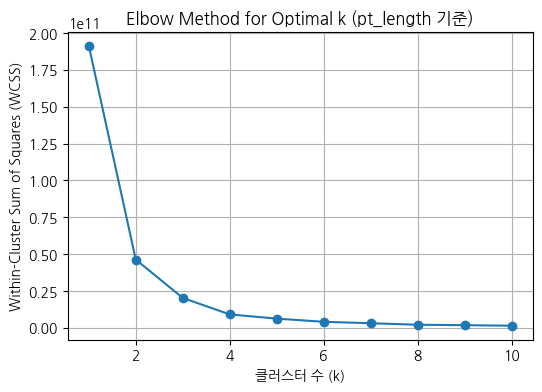

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1D ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Î•º 2DÎ°ú Î≥ÄÌôò (sklearnÏö©)
X = df_raw[['pt_length']].values

# WCSS Ï†ÄÏû• Î¶¨Ïä§Ìä∏
wcss = []

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò 1~10ÍπåÏßÄ ÏãúÎèÑ
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_: WCSS

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k (pt_length Í∏∞Ï§Ä)')
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [38]:
optimal_k = 2  # elbow plot Î≥¥Í≥† ÏÑ†ÌÉù
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_raw['pt_length_cluster'] = kmeans.fit_predict(X)


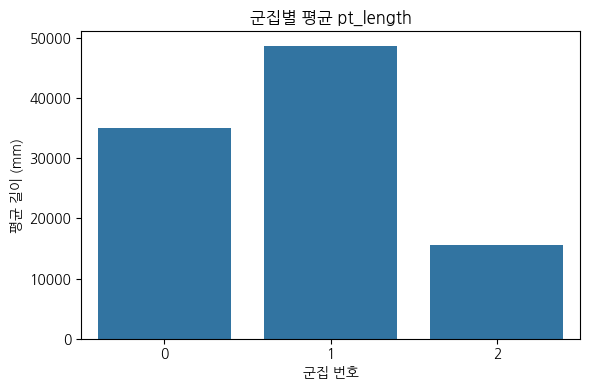

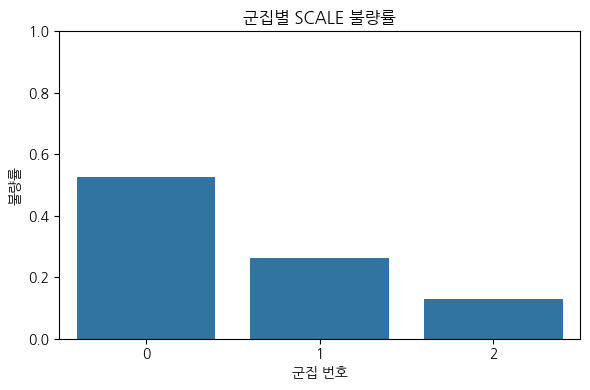

   pt_length_cluster  avg_length  defect_rate  count
0                  0    35021.67         0.53    300
1                  1    48698.06         0.26    463
2                  2    15524.68         0.13    231


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# # scale Ïù¥ÏßÑÌôî (Î∂àÎüâ=1, ÏñëÌíà=0)
# df_raw['scale'] = df_raw['scale'].map({'ÏñëÌíà': 0, 'Î∂àÎüâ': 1})


# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (pt_length Í∏∞Ï§Ä)
k = 3  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
kmeans = KMeans(n_clusters=k, random_state=0)
df_raw['pt_length_cluster'] = kmeans.fit_predict(df_raw[['pt_length']])

# Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† Í∏∏Ïù¥ Î∞è Î∂àÎüâÎ•† ÏßëÍ≥Ñ
summary = df_raw.groupby('pt_length_cluster').agg(
    avg_length=('pt_length', 'mean'),
    defect_rate=('scale', 'mean'),
    count=('scale', 'count')
).reset_index()

# Í∑∏ÎûòÌîÑ: Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† Í∏∏Ïù¥
plt.figure(figsize=(6, 4))
sns.barplot(x='pt_length_cluster', y='avg_length', data=summary)
plt.title('Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑† pt_length')
plt.xlabel('Íµ∞Ïßë Î≤àÌò∏')
plt.ylabel('ÌèâÍ∑† Í∏∏Ïù¥ (mm)')
plt.tight_layout()
plt.show()

# Í∑∏ÎûòÌîÑ: Íµ∞ÏßëÎ≥Ñ Î∂àÎüâÎ•†
plt.figure(figsize=(6, 4))
sns.barplot(x='pt_length_cluster', y='defect_rate', data=summary)
plt.title('Íµ∞ÏßëÎ≥Ñ SCALE Î∂àÎüâÎ•†')
plt.xlabel('Íµ∞Ïßë Î≤àÌò∏')
plt.ylabel('Î∂àÎüâÎ•†')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º ÌôïÏù∏Ïö© ÏöîÏïΩ ÌÖåÏù¥Î∏î
print(summary.round(2))


In [40]:
df_raw

plate_no  scale   spec_long spec_country steel_kind  pt_thick  pt_width  \
0    PLT_1001      0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
1    PLT_1002      0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
2    PLT_1003      0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
3    PLT_1004      0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
4    PLT_1005      0  BV-EH36-TM          ÌîÑÎûëÏä§          T        38      3100   
..        ...    ...         ...          ...        ...       ...       ...   
995  PLT_1996      0        BV-A          ÌîÑÎûëÏä§          C        19      3400   
996  PLT_1997      0        LR-A           ÏòÅÍµ≠          C        19      3400   
997  PLT_1998      0     AB/AH32           ÎØ∏Íµ≠          C        17      3400   
998  PLT_1999      0      NV-A32           ÏòÅÍµ≠          C        17      3400   
999  PLT_2000      0      GL-A32           ÎèÖÏùº          C        16      3400   

     pt_length hsb fur_no  ... is_high_strength  is_ship_steel  \
0        15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...            False           True   
1        15100  Ï†ÅÏö©    1Ìò∏Í∏∞  ...            False           True   
2        19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...            False          False   
3        19200  Ï†ÅÏö©    2Ìò∏Í∏∞  ...            False          False   
4        13300  Ï†ÅÏö©    3Ìò∏Í∏∞  ...             True           True   
..         ...  ..    ...  ...              ...            ...   
995      41500  Ï†ÅÏö©    1Ìò∏Í∏∞  ...            False           True   
996      41500  Ï†ÅÏö©    1Ìò∏Í∏∞  ...            False           True   
997      43700  Ï†ÅÏö©    2Ìò∏Í∏∞  ...            False           True   
998      43700  Ï†ÅÏö©    2Ìò∏Í∏∞  ...            False          False   
999      54200  Ï†ÅÏö©    3Ìò∏Í∏∞  ...            False           True   

     heat_treatment_type  spec_grade  heat_temp_high  soak_temp_high  \
0                     TM        EH32           False           False   
1                     TM        EH32           False           False   
2                     TM     UNKNOWN           False           False   
3                     TM     UNKNOWN            True           False   
4                     TM        EH36           False           False   
..                   ...         ...             ...             ...   
995                 None     UNKNOWN           False            True   
996                 None     UNKNOWN           False            True   
997                 None        AH32            True            True   
998                 None     UNKNOWN            True            True   
999                 None     UNKNOWN            True            True   

    both_temp_high  descaling_parity  rolling_temp_1000 pt_length_cluster  
0            False              even                low                 2  
1            False              even                low                 2  
2            False              even                low                 2  
3            False              even                low                 2  
4            False              even                low                 2  
..             ...               ...                ...               ...  
995          False              even                low                 0  
996          False              even                low                 0  
997           True              even                low                 1  
998           True              even                low                 1  
999           True              even                low                 1  

[994 rows x 34 columns]

### 2-3. ÏòàÏó¥ÏãúÍ∞Ñ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

In [41]:
# ÏòàÏó¥ÏãúÍ∞Ñ = ÌÜ†ÌÉà -(ÏÜåÌÅ¨ + ÌûàÌä∏)

In [42]:
df_raw.columns

Index(['plate_no', 'scale', 'spec_long', 'spec_country', 'steel_kind',
       'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'rolling_method', 'rolling_temp', 'descaling_count',
       'work_group', 'day', 'hour', 'minute', 'weekday_number',
       'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
       'spec_grade', 'heat_temp_high', 'soak_temp_high', 'both_temp_high',
       'descaling_parity', 'rolling_temp_1000', 'pt_length_cluster'],
      dtype='object')

In [43]:
df_raw['preheat_time']=df_raw['fur_total_time']-(df_raw['fur_soak_time']+df_raw['fur_heat_time'])

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
df_raw

plate_no  scale   spec_long spec_country steel_kind  pt_thick  pt_width  \
0    PLT_1001      0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
1    PLT_1002      0  AB/EH32-TM           ÎØ∏Íµ≠          T        32      3700   
2    PLT_1003      0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
3    PLT_1004      0   NV-E36-TM           ÏòÅÍµ≠          T        33      3600   
4    PLT_1005      0  BV-EH36-TM          ÌîÑÎûëÏä§          T        38      3100   
..        ...    ...         ...          ...        ...       ...       ...   
995  PLT_1996      0        BV-A          ÌîÑÎûëÏä§          C        19      3400   
996  PLT_1997      0        LR-A           ÏòÅÍµ≠          C        19      3400   
997  PLT_1998      0     AB/AH32           ÎØ∏Íµ≠          C        17      3400   
998  PLT_1999      0      NV-A32           ÏòÅÍµ≠          C        17      3400   
999  PLT_2000      0      GL-A32           ÎèÖÏùº          C        16      3400   

     pt_length hsb fur_no fur_input_row  fur_heat_temp  fur_heat_time  \
0        15100  Ï†ÅÏö©    1Ìò∏Í∏∞            1Ïó¥           1144            116   
1        15100  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥           1144            122   
2        19200  Ï†ÅÏö©    2Ìò∏Í∏∞            1Ïó¥           1129            116   
3        19200  Ï†ÅÏö©    2Ìò∏Í∏∞            2Ïó¥           1152            125   
4        13300  Ï†ÅÏö©    3Ìò∏Í∏∞            1Ïó¥           1140            134   
..         ...  ..    ...           ...            ...            ...   
995      41500  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥           1142             55   
996      41500  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥           1142             55   
997      43700  Ï†ÅÏö©    2Ìò∏Í∏∞            2Ïó¥           1169             65   
998      43700  Ï†ÅÏö©    2Ìò∏Í∏∞            2Ïó¥           1169             65   
999      54200  Ï†ÅÏö©    3Ìò∏Í∏∞            1Ïó¥           1186             82   

     fur_soak_temp  fur_soak_time  fur_total_time rolling_method  \
0             1133             59             259     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
1             1135             53             238     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
2             1121             55             258     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
3             1127             68             266     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
4             1128             48             246     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
..             ...            ...             ...            ...   
995           1151             86             203       CR(Ï†úÏñ¥ÏïïÏó∞)   
996           1151             86             209       CR(Ï†úÏñ¥ÏïïÏó∞)   
997           1163             77             227       CR(Ï†úÏñ¥ÏïïÏó∞)   
998           1163             77             204       CR(Ï†úÏñ¥ÏïïÏó∞)   
999           1169             45             208       CR(Ï†úÏñ¥ÏïïÏó∞)   

     rolling_temp  descaling_count work_group  day  hour  minute  \
0             934                8         1Ï°∞    3     7       7   
1             937                8         1Ï°∞    3     7      21   
2             889                8         1Ï°∞    3     7      31   
3             885                8         1Ï°∞    3     7      41   
4             873                8         1Ï°∞    3     7      52   
..            ...              ...        ...  ...   ...     ...   
995           948               10         4Ï°∞   10     5      32   
996           948               10         4Ï°∞   10     5      39   
997           948               10         4Ï°∞   10     5      52   
998           948               10         4Ï°∞   10     6       1   
999           957               10         4Ï°∞   10     6      16   

     weekday_number  is_high_strength  is_ship_steel heat_treatment_type  \
0                 1             False           True                  TM   
1                 1             False           True                  TM   
2                 1             False          False         

### 2-4 HSB Ï†ÅÏö©(1), ÎØ∏Ï†ÅÏö©(0) ÎçîÎØ∏

In [46]:
# df_raw['hsb'].unique()

In [47]:
# df_raw['hsb'] = df_raw['hsb'].map({'Ï†ÅÏö©': 1, 'ÎØ∏Ï†ÅÏö©': 0})

In [48]:
# df_raw['hsb'].unique()

In [49]:
df_raw['is_high_strength'].value_counts()

is_high_strength
False    775
True     219
Name: count, dtype: int64

In [50]:
df_raw['spec_country'].unique()

array(['ÎØ∏Íµ≠', 'ÏòÅÍµ≠', 'ÌîÑÎûëÏä§', 'Í≥µÌÜµ', 'ÎèÖÏùº', 'ÌïúÍµ≠', 'ÏùºÎ≥∏'], dtype=object)

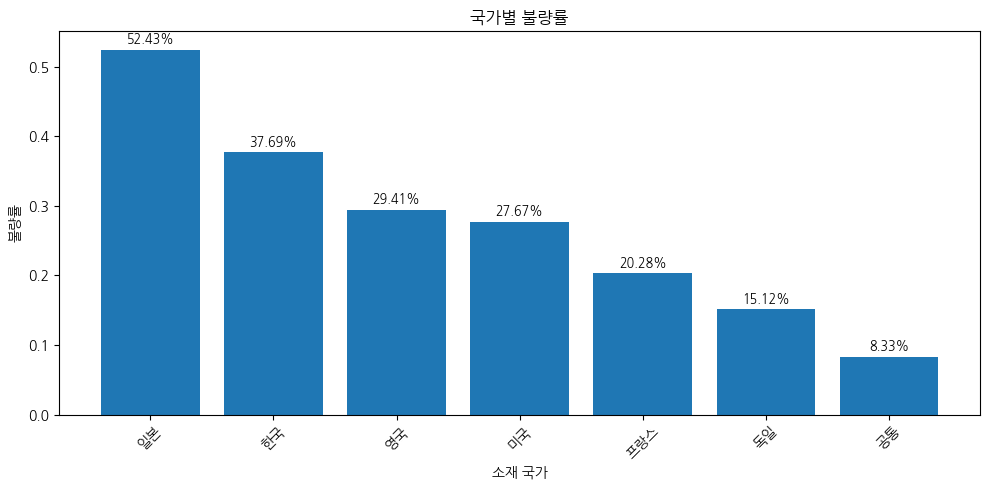

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# 'Î∂àÎüâ' ‚Üí 1, 'ÏñëÌíà' ‚Üí 0 ÏúºÎ°ú Î≥ÄÌôò


# Íµ≠Í∞ÄÎ≥Ñ Î∂àÎüâÎ•† Í≥ÑÏÇ∞
country_defect_rate = df_raw.groupby('spec_country')['scale'].mean().sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
bars = plt.bar(country_defect_rate.index, country_defect_rate.values)

# ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú (ÌçºÏÑºÌä∏)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.2%}',
             ha='center', va='bottom', fontsize=9)

plt.title('Íµ≠Í∞ÄÎ≥Ñ Î∂àÎüâÎ•†')
plt.xlabel('ÏÜåÏû¨ Íµ≠Í∞Ä')
plt.ylabel('Î∂àÎüâÎ•†')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


spec_country ÎìúÎûç Í≤∞Ï†ï!!!!!!!!!!! -> Îã§Î•∏ Î≥ÄÏàòÎì§Ïù¥ Ï∂©Î∂ÑÌûà ÏÑ§Î™Ö Í∞ÄÎä•Ìï†ÎìØ

### 2-5. Ï§ëÎ≥µ Î≥ÄÏàò 1Ï∞® ÎìúÎûç

In [52]:
df_raw.drop(['plate_no', 'spec_long','spec_country','spec_grade'], axis=1, inplace=True)

In [53]:
df_raw.drop(['descaling_count'],axis=1,inplace=True)

In [54]:
df_raw

scale steel_kind  pt_thick  pt_width  pt_length hsb fur_no fur_input_row  \
0        0          T        32      3700      15100  Ï†ÅÏö©    1Ìò∏Í∏∞            1Ïó¥   
1        0          T        32      3700      15100  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥   
2        0          T        33      3600      19200  Ï†ÅÏö©    2Ìò∏Í∏∞            1Ïó¥   
3        0          T        33      3600      19200  Ï†ÅÏö©    2Ìò∏Í∏∞            2Ïó¥   
4        0          T        38      3100      13300  Ï†ÅÏö©    3Ìò∏Í∏∞            1Ïó¥   
..     ...        ...       ...       ...        ...  ..    ...           ...   
995      0          C        19      3400      41500  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥   
996      0          C        19      3400      41500  Ï†ÅÏö©    1Ìò∏Í∏∞            2Ïó¥   
997      0          C        17      3400      43700  Ï†ÅÏö©    2Ìò∏Í∏∞            2Ïó¥   
998      0          C        17      3400      43700  Ï†ÅÏö©    2Ìò∏Í∏∞            2Ïó¥   
999      0          C        16      3400      54200  Ï†ÅÏö©    3Ìò∏Í∏∞            1Ïó¥   

     fur_heat_temp  fur_heat_time  fur_soak_temp  fur_soak_time  \
0             1144            116           1133             59   
1             1144            122           1135             53   
2             1129            116           1121             55   
3             1152            125           1127             68   
4             1140            134           1128             48   
..             ...            ...            ...            ...   
995           1142             55           1151             86   
996           1142             55           1151             86   
997           1169             65           1163             77   
998           1169             65           1163             77   
999           1186             82           1169             45   

     fur_total_time rolling_method  rolling_temp work_group  day  hour  \
0               259     TMCP(Ïò®ÎèÑÏ†úÏñ¥)           934         1Ï°∞    3     7   
1               238     TMCP(Ïò®ÎèÑÏ†úÏñ¥)           937         1Ï°∞    3     7   
2               258     TMCP(Ïò®ÎèÑÏ†úÏñ¥)           889         1Ï°∞    3     7   
3               266     TMCP(Ïò®ÎèÑÏ†úÏñ¥)           885         1Ï°∞    3     7   
4               246     TMCP(Ïò®ÎèÑÏ†úÏñ¥)           873         1Ï°∞    3     7   
..              ...            ...           ...        ...  ...   ...   
995             203       CR(Ï†úÏñ¥ÏïïÏó∞)           948         4Ï°∞   10     5   
996             209       CR(Ï†úÏñ¥ÏïïÏó∞)           948         4Ï°∞   10     5   
997             227       CR(Ï†úÏñ¥ÏïïÏó∞)           948         4Ï°∞   10     5   
998             204       CR(Ï†úÏñ¥ÏïïÏó∞)           948         4Ï°∞   10     6   
999             208       CR(Ï†úÏñ¥ÏïïÏó∞)           957         4Ï°∞   10     6   

     minute  weekday_number  is_high_strength  is_ship_steel  \
0         7               1             False           True   
1        21               1             False           True   
2        31               1             False          False   
3        41               1             False          False   
4        52               1              True           True   
..      ...             ...               ...            ...   
995      32               1             False           True   
996      39               1             False           True   
997      52               1             False           True   
998       1               1             False          False   
999      16               1             False           True   

    heat_treatment_type  heat_temp_high  soak_temp_high  both_temp_high  \
0                    TM           False           False           False   
1                    TM           False           False           False   
2                    TM           False           False           False   
3                    TM            True           False           Fal

In [55]:
df_raw.columns

Index(['scale', 'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb',
       'fur_no', 'fur_input_row', 'fur_heat_temp', 'fur_heat_time',
       'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_method',
       'rolling_temp', 'work_group', 'day', 'hour', 'minute', 'weekday_number',
       'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
       'heat_temp_high', 'soak_temp_high', 'both_temp_high',
       'descaling_parity', 'rolling_temp_1000', 'pt_length_cluster',
       'preheat_time'],
      dtype='object')

## 3. Í≤ÄÏ†ï

### 3-0. Î≥ÄÏàò Î∂ÑÎ¶¨

In [56]:
# Î™©ÌëúÎ≥ÄÏàò Ï†úÏô∏
X = df_raw.drop(columns=['scale'])

# Î≥ÄÏàò ÌÉÄÏûÖÎ≥Ñ Î∂ÑÎ¶¨
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", numerical_cols)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_cols)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_temp', 'preheat_time']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['steel_kind', 'hsb', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group', 'is_high_strength', 'is_ship_steel', 'heat_treatment_type', 'heat_temp_high', 'soak_temp_high', 'both_temp_high', 'descaling_parity', 'rolling_temp_1000']


In [57]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î™©ÌëúÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò
corr_with_target = df_raw[numerical_cols + ['scale']].corr()['scale'].drop('scale').sort_values(ascending=False)
print(corr_with_target)

rolling_temp      0.511333
fur_soak_temp     0.326957
fur_heat_temp     0.220581
pt_length         0.048928
preheat_time      0.037959
fur_heat_time    -0.036178
pt_thick         -0.094441
fur_total_time   -0.129333
pt_width         -0.193817
fur_soak_time    -0.220873
Name: scale, dtype: float64


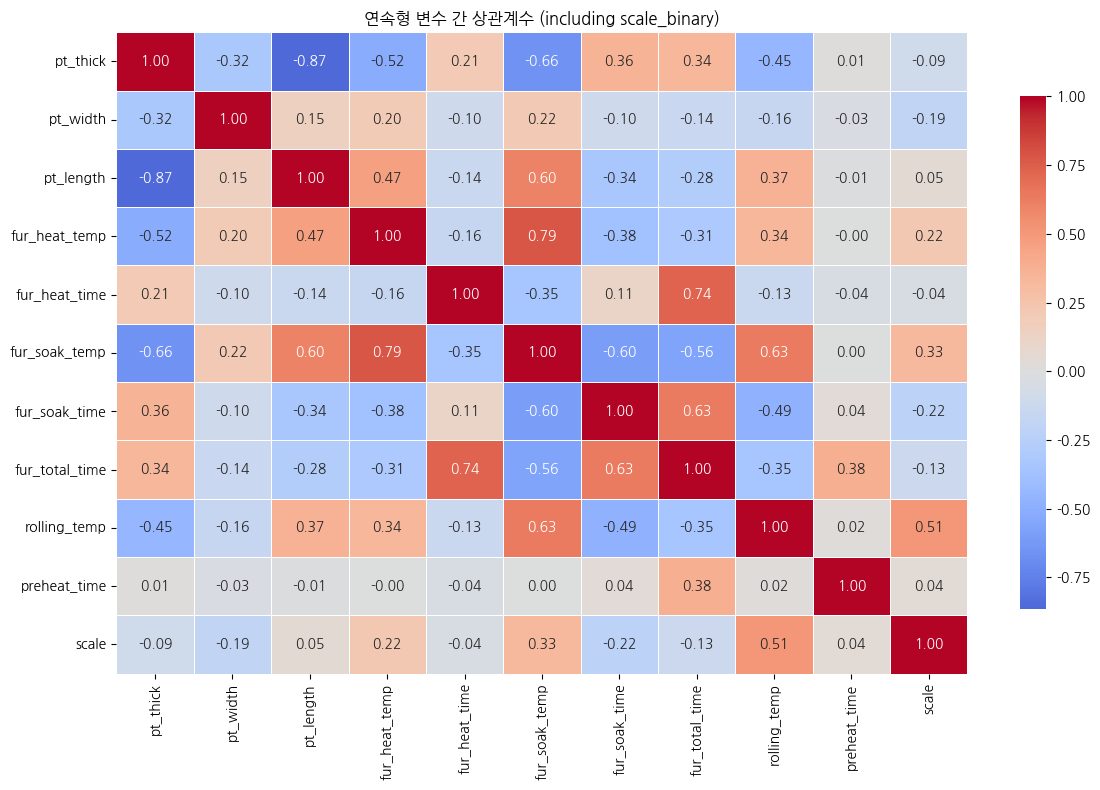

In [58]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ (Ïó∞ÏÜçÌòï Î≥ÄÏàò + scale_binary Ìè¨Ìï®)
corr_matrix = df_raw[numerical_cols + ['scale']].corr()

# ÏãúÍ∞ÅÌôî: ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (including scale_binary)")
plt.tight_layout()
plt.show()


In [59]:
# VIF Í≥ÑÏÇ∞Ïö© Îç∞Ïù¥ÌÑ∞
X_num = df_raw[numerical_cols].dropna()  # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
X_num_const = add_constant(X_num)

vif = pd.DataFrame()
vif["Î≥ÄÏàòÎ™Ö"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num_const.values, i + 1) for i in range(len(X_num.columns))]

print(vif.sort_values(by='VIF', ascending=False))

              Î≥ÄÏàòÎ™Ö       VIF
4   fur_heat_time       inf
6   fur_soak_time       inf
7  fur_total_time       inf
9    preheat_time       inf
5   fur_soak_temp  7.475719
0        pt_thick  5.977490
2       pt_length  4.813312
3   fur_heat_temp  3.267657
8    rolling_temp  2.552118
1        pt_width  1.564876


### 3-1. Î≤îÏ£ºÌòï Î™©ÌëúÎ≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï ÏÑ§Î™ÖÎ≥ÄÏàòÏùò Í≤ÄÏ†ï(tÍ≤ÄÏ†ï)

### 3-2. Î≤îÏ£ºÌòï Î™©ÌëúÎ≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï ÏÑ§Î™ÖÎ≥ÄÏàòÏùò Í≤ÄÏ†ï(Ïπ¥Ïù¥ Í≤ÄÏ†ï)

In [60]:
from scipy.stats import chi2_contingency
import pandas as pd

# Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
categorical_var = [
    'steel_kind', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group',
    'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
    'heat_temp_high', 'soak_temp_high', 'both_temp_high',
    'descaling_parity', 'rolling_temp_1000', 'hsb'
]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
chi2_results = []

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
for var in categorical_var:
    try:
        contingency_table = pd.crosstab(df_raw[var], df_raw['scale'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results.append({
            'Î≥ÄÏàò': var,
            'Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ': round(chi2, 4),
            'p-value': p_value,
            'Ïú†ÏùòÎØ∏ Ïó¨Î∂Ä(p<0.05)': '‚úÖ' if p_value < 0.05 else '‚ùå'
        })
    except Exception as e:
        chi2_results.append({
            'Î≥ÄÏàò': var,
            'Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ': 'Error',
            'p-value': 'Error',
            'Ïú†ÏùòÎØ∏ Ïó¨Î∂Ä(p<0.05)': f'ÏóêÎü¨: {str(e)}'
        })

# Í≤∞Í≥ºÎ•º Ìëú ÌòïÌÉúÎ°ú Ï†ïÎ¶¨
chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values(by='p-value', ascending=True, key=lambda x: x if x.dtype != 'O' else pd.Series([1e9]*len(x)))

# ÏòàÏÅòÍ≤å Ï∂úÎ†•
from IPython.display import display
display(chi2_df)


Î≥ÄÏàò  Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ        p-value Ïú†ÏùòÎØ∏ Ïó¨Î∂Ä(p<0.05)
12    rolling_temp_1000  493.2474  2.800438e-109              ‚úÖ
11     descaling_parity  130.0387   4.018711e-30              ‚úÖ
13                  hsb  105.5105   9.439705e-25              ‚úÖ
9        soak_temp_high  101.3963   7.530423e-24              ‚úÖ
10       both_temp_high   92.0397   8.495499e-22              ‚úÖ
0            steel_kind   76.2577   2.489547e-18              ‚úÖ
8        heat_temp_high   46.3607   9.836905e-12              ‚úÖ
3        rolling_method   44.8800   2.094833e-11              ‚úÖ
7   heat_treatment_type   44.1891   2.537821e-10              ‚úÖ
6         is_ship_steel   24.8885   6.074214e-07              ‚úÖ
4            work_group   13.9006   3.043656e-03              ‚úÖ
5      is_high_strength    5.5028   1.898594e-02              ‚úÖ
1                fur_no    3.1186   2.102809e-01              ‚ùå
2         fur_input_row    0.9204   3.373786e-01              ‚ùå

3-3. Î≤îÏ£ºÌòï Î™©ÌëúÎ≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï ÏÑ§Î™ÖÎ≥ÄÏàòÏùò Í≤ÄÏ†ï(ÏïÑÎÖ∏Î∞î Í≤ÄÏ†ï)

In [61]:
from scipy.stats import f_oneway
import pandas as pd

# Ïó∞ÏÜçÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
numerical_cols = [
    'pt_thick', 'pt_width', 'pt_length',
    'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
    'fur_total_time', 'rolling_temp', 'preheat_time'
]

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
anova_results = []

# Í∑∏Î£π ÎÇòÎàÑÍ∏∞: ÏñëÌíà(0), Î∂àÎüâ(1)
for col in numerical_cols:
    try:
        group0 = df_raw[df_raw['scale'] == 0][col].dropna()
        group1 = df_raw[df_raw['scale'] == 1][col].dropna()
        f_stat, p = f_oneway(group0, group1)
        anova_results.append({
            'Î≥ÄÏàò': col,
            'F-ÌÜµÍ≥ÑÎüâ': round(f_stat, 4),
            'p-value': p,
            'Ïú†ÏùòÎØ∏ Ïó¨Î∂Ä(p<0.05)': '‚úÖ' if p < 0.05 else '‚ùå'
        })
    except Exception as e:
        anova_results.append({
            'Î≥ÄÏàò': col,
            'F-ÌÜµÍ≥ÑÎüâ': 'Error',
            'p-value': 'Error',
            'Ïú†ÏùòÎØ∏ Ïó¨Î∂Ä(p<0.05)': f'ÏóêÎü¨: {str(e)}'
        })

# Í≤∞Í≥º ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
anova_df = pd.DataFrame(anova_results)

# Í≤∞Í≥º Ï∂úÎ†•
anova_df.sort_values('p-value', ascending=True)


Î≥ÄÏàò     F-ÌÜµÍ≥ÑÎüâ       p-value Ïú†ÏùòÎØ∏ Ïó¨Î∂Ä(p<0.05)
8    rolling_temp  351.1939  2.550535e-67              ‚úÖ
5   fur_soak_temp  118.7386  3.402662e-26              ‚úÖ
6   fur_soak_time   50.8768  1.894621e-12              ‚úÖ
3   fur_heat_temp   50.7352  2.029132e-12              ‚úÖ
1        pt_width   38.7191  7.207975e-10              ‚úÖ
7  fur_total_time   16.8754  4.320700e-05              ‚úÖ
0        pt_thick    8.9274  2.878359e-03              ‚úÖ
2       pt_length    2.3805  1.231808e-01              ‚ùå
9    preheat_time    1.4314  2.318205e-01              ‚ùå
4   fur_heat_time    1.3001  2.544689e-01              ‚ùå

In [62]:
#ÎìúÎûç

In [63]:
## Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ÉÎì§ Ï†úÍ±∞ 

In [64]:
df_raw.drop(['fur_no','fur_input_row'],axis=1,inplace=True)

In [65]:
## ANNOVA Í≤ÄÏ†ï Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ÉÎì§ Ï†úÍ±∞ 

In [66]:
df_raw.drop(['pt_length','preheat_time', 'fur_heat_time'],axis=1,inplace=True)

In [67]:
df_raw.drop(['fur_total_time','pt_thick'],axis=1,inplace=True)

In [68]:
df_raw.drop(['fur_heat_temp', 'fur_soak_temp'],axis=1,inplace=True)

In [69]:
df_drop = df_raw

In [70]:
df_drop

scale steel_kind  pt_width hsb  fur_soak_time rolling_method  \
0        0          T      3700  Ï†ÅÏö©             59     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
1        0          T      3700  Ï†ÅÏö©             53     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
2        0          T      3600  Ï†ÅÏö©             55     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
3        0          T      3600  Ï†ÅÏö©             68     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
4        0          T      3100  Ï†ÅÏö©             48     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
..     ...        ...       ...  ..            ...            ...   
995      0          C      3400  Ï†ÅÏö©             86       CR(Ï†úÏñ¥ÏïïÏó∞)   
996      0          C      3400  Ï†ÅÏö©             86       CR(Ï†úÏñ¥ÏïïÏó∞)   
997      0          C      3400  Ï†ÅÏö©             77       CR(Ï†úÏñ¥ÏïïÏó∞)   
998      0          C      3400  Ï†ÅÏö©             77       CR(Ï†úÏñ¥ÏïïÏó∞)   
999      0          C      3400  Ï†ÅÏö©             45       CR(Ï†úÏñ¥ÏïïÏó∞)   

     rolling_temp work_group  day  hour  minute  weekday_number  \
0             934         1Ï°∞    3     7       7               1   
1             937         1Ï°∞    3     7      21               1   
2             889         1Ï°∞    3     7      31               1   
3             885         1Ï°∞    3     7      41               1   
4             873         1Ï°∞    3     7      52               1   
..            ...        ...  ...   ...     ...             ...   
995           948         4Ï°∞   10     5      32               1   
996           948         4Ï°∞   10     5      39               1   
997           948         4Ï°∞   10     5      52               1   
998           948         4Ï°∞   10     6       1               1   
999           957         4Ï°∞   10     6      16               1   

     is_high_strength  is_ship_steel heat_treatment_type  heat_temp_high  \
0               False           True                  TM           False   
1               False           True                  TM           False   
2               False          False                  TM           False   
3               False          False                  TM            True   
4                True           True                  TM           False   
..                ...            ...                 ...             ...   
995             False           True                None           False   
996             False           True                None           False   
997             False           True                None            True   
998             False          False                None            True   
999             False           True                None            True   

     soak_temp_high  both_temp_high descaling_parity rolling_temp_1000  \
0             False           False             even               low   
1             False           False             even               low   
2             False           False             even               low   
3             False           False             even               low   
4             False           False             even               low   
..              ...             ...              ...               ...   
995            True           False             even               low   
996            True           False             even               low   
997            True            True             even               low   
998            True            True             even               low   
999            True            True             even               low   

     pt_length_cluster  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
..                 ...  
995                  0  
996                  0  
997                  1  
998                  1  
999                  1  

[994 rows x 21 columns]

In [71]:
df_drop[df_drop['heat_treatment_type']=='None']

scale steel_kind  pt_width hsb  fur_soak_time rolling_method  \
10       0          T      3100  Ï†ÅÏö©             73       CR(Ï†úÏñ¥ÏïïÏó∞)   
12       0          T      3100  Ï†ÅÏö©             58       CR(Ï†úÏñ¥ÏïïÏó∞)   
14       0          T      3100  Ï†ÅÏö©             62       CR(Ï†úÏñ¥ÏïïÏó∞)   
15       1          T      3100  Ï†ÅÏö©             68       CR(Ï†úÏñ¥ÏïïÏó∞)   
17       0          T      1900  Ï†ÅÏö©             65       CR(Ï†úÏñ¥ÏïïÏó∞)   
..     ...        ...       ...  ..            ...            ...   
995      0          C      3400  Ï†ÅÏö©             86       CR(Ï†úÏñ¥ÏïïÏó∞)   
996      0          C      3400  Ï†ÅÏö©             86       CR(Ï†úÏñ¥ÏïïÏó∞)   
997      0          C      3400  Ï†ÅÏö©             77       CR(Ï†úÏñ¥ÏïïÏó∞)   
998      0          C      3400  Ï†ÅÏö©             77       CR(Ï†úÏñ¥ÏïïÏó∞)   
999      0          C      3400  Ï†ÅÏö©             45       CR(Ï†úÏñ¥ÏïïÏó∞)   

     rolling_temp work_group  day  hour  minute  weekday_number  \
10            881         1Ï°∞    3     8      54               1   
12            869         1Ï°∞    3     9      17               1   
14            820         1Ï°∞    3     9      33               1   
15           1057         1Ï°∞    3     9      42               1   
17            926         1Ï°∞    3    10       0               1   
..            ...        ...  ...   ...     ...             ...   
995           948         4Ï°∞   10     5      32               1   
996           948         4Ï°∞   10     5      39               1   
997           948         4Ï°∞   10     5      52               1   
998           948         4Ï°∞   10     6       1               1   
999           957         4Ï°∞   10     6      16               1   

     is_high_strength  is_ship_steel heat_treatment_type  heat_temp_high  \
10              False          False                None           False   
12              False          False                None           False   
14              False          False                None           False   
15              False          False                None           False   
17              False          False                None           False   
..                ...            ...                 ...             ...   
995             False           True                None           False   
996             False           True                None           False   
997             False           True                None            True   
998             False          False                None            True   
999             False           True                None            True   

     soak_temp_high  both_temp_high descaling_parity rolling_temp_1000  \
10            False           False             even               low   
12            False           False             even               low   
14            False           False             even               low   
15            False           False             even              high   
17            False           False             even               low   
..              ...             ...              ...               ...   
995            True           False             even               low   
996            True           False             even               low   
997            True            True             even               low   
998            True            True             even               low   
999            True            True             even               low   

     pt_length_cluster  
10                   2  
12                   2  
14                   2  
15                   2  
17                   0  
..                 ...  
995                  0  
996                  0  
997                  1  
998                  1  
999                  1  

[832 rows x 21 columns]

In [72]:
df_drop.drop('heat_treatment_type',axis=1,inplace=True)

In [73]:
df_drop

scale steel_kind  pt_width hsb  fur_soak_time rolling_method  \
0        0          T      3700  Ï†ÅÏö©             59     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
1        0          T      3700  Ï†ÅÏö©             53     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
2        0          T      3600  Ï†ÅÏö©             55     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
3        0          T      3600  Ï†ÅÏö©             68     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
4        0          T      3100  Ï†ÅÏö©             48     TMCP(Ïò®ÎèÑÏ†úÏñ¥)   
..     ...        ...       ...  ..            ...            ...   
995      0          C      3400  Ï†ÅÏö©             86       CR(Ï†úÏñ¥ÏïïÏó∞)   
996      0          C      3400  Ï†ÅÏö©             86       CR(Ï†úÏñ¥ÏïïÏó∞)   
997      0          C      3400  Ï†ÅÏö©             77       CR(Ï†úÏñ¥ÏïïÏó∞)   
998      0          C      3400  Ï†ÅÏö©             77       CR(Ï†úÏñ¥ÏïïÏó∞)   
999      0          C      3400  Ï†ÅÏö©             45       CR(Ï†úÏñ¥ÏïïÏó∞)   

     rolling_temp work_group  day  hour  minute  weekday_number  \
0             934         1Ï°∞    3     7       7               1   
1             937         1Ï°∞    3     7      21               1   
2             889         1Ï°∞    3     7      31               1   
3             885         1Ï°∞    3     7      41               1   
4             873         1Ï°∞    3     7      52               1   
..            ...        ...  ...   ...     ...             ...   
995           948         4Ï°∞   10     5      32               1   
996           948         4Ï°∞   10     5      39               1   
997           948         4Ï°∞   10     5      52               1   
998           948         4Ï°∞   10     6       1               1   
999           957         4Ï°∞   10     6      16               1   

     is_high_strength  is_ship_steel  heat_temp_high  soak_temp_high  \
0               False           True           False           False   
1               False           True           False           False   
2               False          False           False           False   
3               False          False            True           False   
4                True           True           False           False   
..                ...            ...             ...             ...   
995             False           True           False            True   
996             False           True           False            True   
997             False           True            True            True   
998             False          False            True            True   
999             False           True            True            True   

     both_temp_high descaling_parity rolling_temp_1000  pt_length_cluster  
0             False             even               low                  2  
1             False             even               low                  2  
2             False             even               low                  2  
3             False             even               low                  2  
4             False             even               low                  2  
..              ...              ...               ...                ...  
995           False             even               low                  0  
996           False             even               low                  0  
997            True             even               low                  1  
998            True             even               low                  1  
999            True             even               low                  1  

[994 rows x 20 columns]

In [74]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   scale              994 non-null    int32 
 1   steel_kind         994 non-null    object
 2   pt_width           994 non-null    int64 
 3   hsb                994 non-null    object
 4   fur_soak_time      994 non-null    int64 
 5   rolling_method     994 non-null    object
 6   rolling_temp       994 non-null    int64 
 7   work_group         994 non-null    object
 8   day                994 non-null    int32 
 9   hour               994 non-null    int32 
 10  minute             994 non-null    int32 
 11  weekday_number     994 non-null    int32 
 12  is_high_strength   994 non-null    bool  
 13  is_ship_steel      994 non-null    bool  
 14  heat_temp_high     994 non-null    bool  
 15  soak_temp_high     994 non-null    bool  
 16  both_temp_high     994 non-null    bool  
 17  de

In [75]:
#ÏÇ∞Ï†êÎèÑ

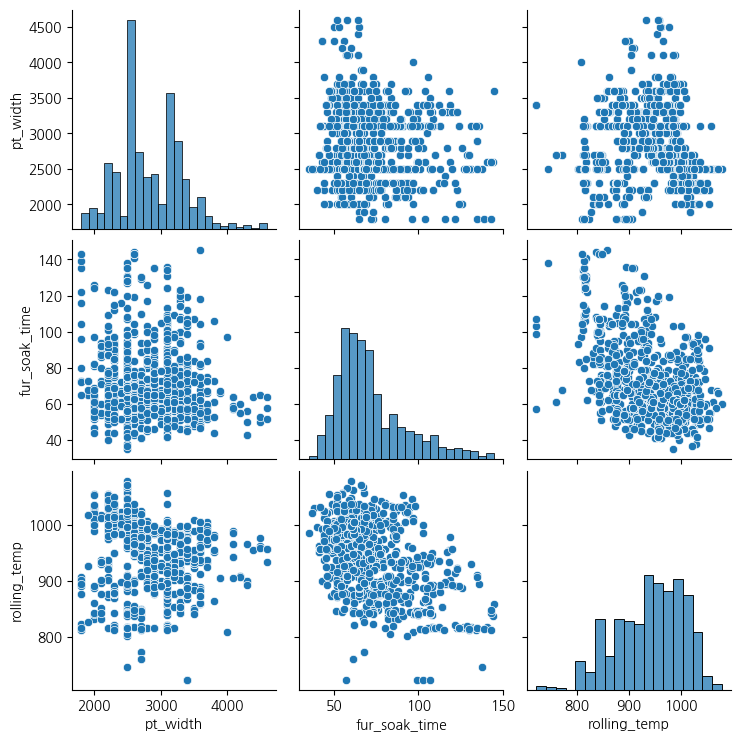

In [76]:
variables = [ 'pt_width', 'fur_soak_time',
     'rolling_temp']

sns.pairplot(df_drop[variables])
plt.show()

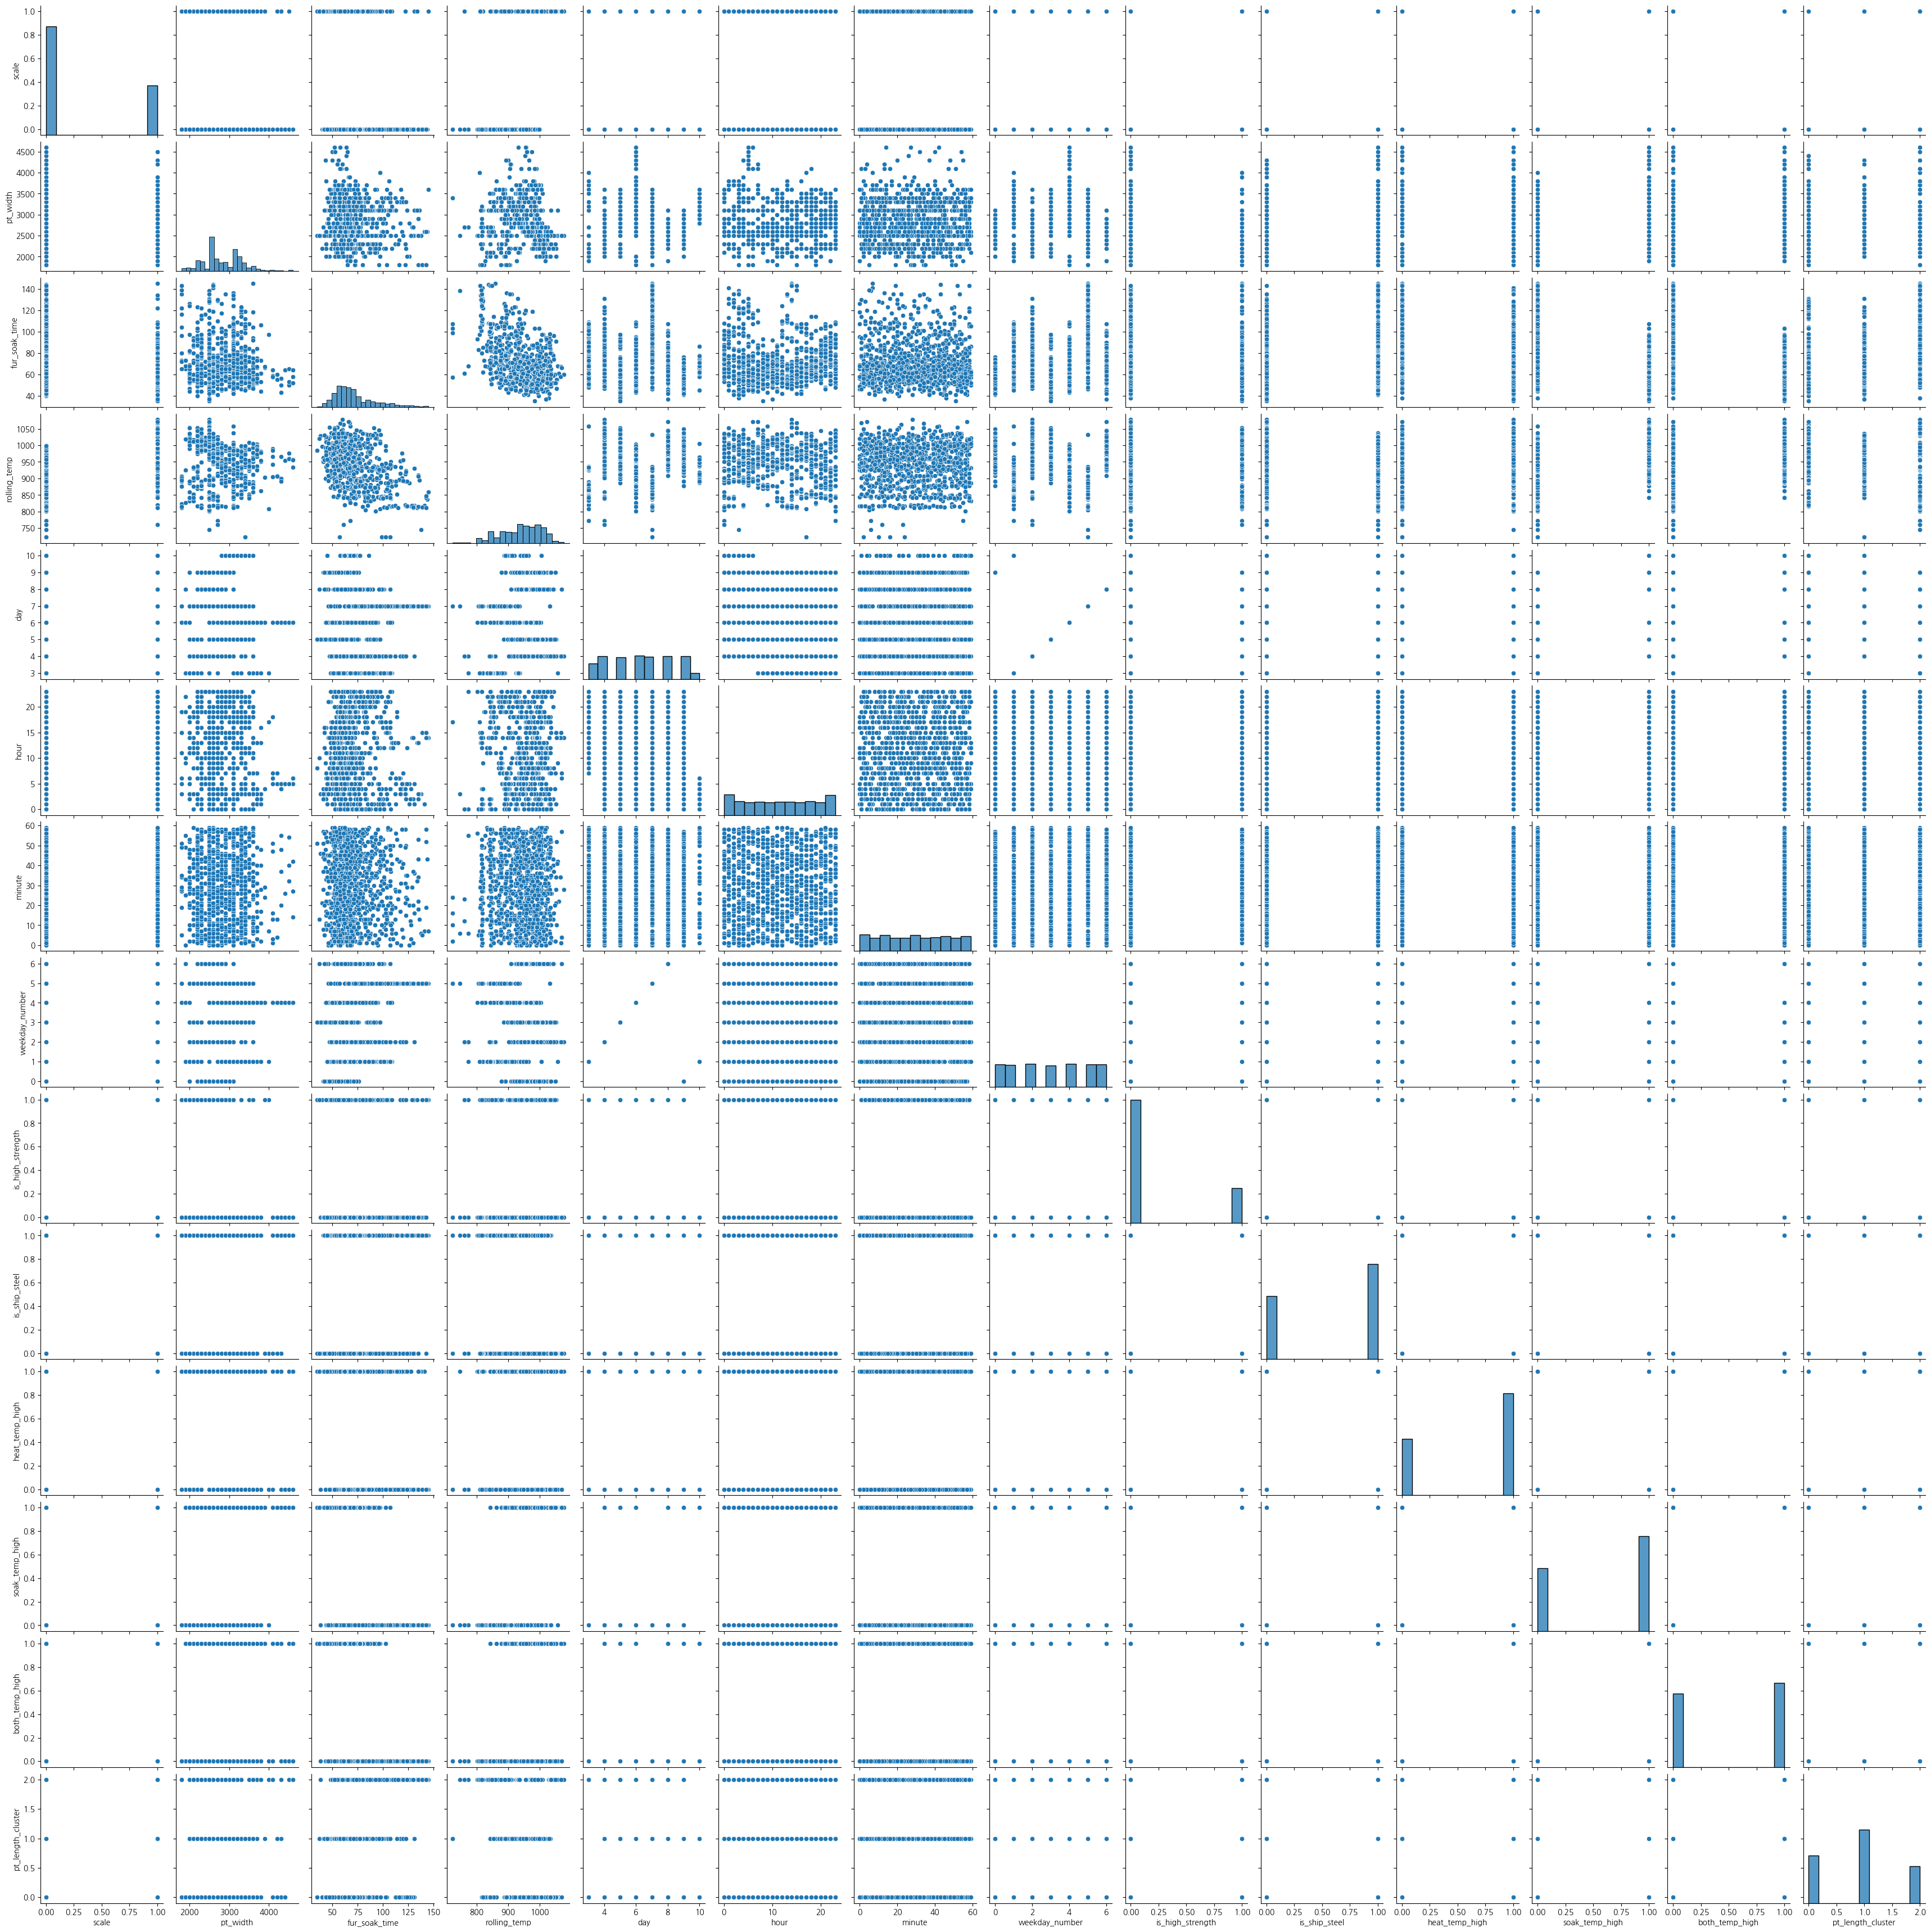

In [77]:
sns.pairplot(df_drop)
plt.show()

In [78]:
categorical_cols = [
    'steel_kind',  'rolling_method', 'work_group',
    'is_high_strength', 'is_ship_steel', 
    'heat_temp_high', 'soak_temp_high', 'both_temp_high',
    'descaling_parity', 'rolling_temp_1000', 'hsb'
]  # Îì±Îì±

# ÎçîÎØ∏Ìôî + 0/1 Î≥ÄÌôò
df_dummy = pd.get_dummies(df_drop, columns=categorical_cols, drop_first=True)
df_dummy = df_dummy.astype(int)

In [79]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   scale                      994 non-null    int32
 1   pt_width                   994 non-null    int32
 2   fur_soak_time              994 non-null    int32
 3   rolling_temp               994 non-null    int32
 4   day                        994 non-null    int32
 5   hour                       994 non-null    int32
 6   minute                     994 non-null    int32
 7   weekday_number             994 non-null    int32
 8   pt_length_cluster          994 non-null    int32
 9   steel_kind_T               994 non-null    int32
 10  rolling_method_TMCP(Ïò®ÎèÑÏ†úÏñ¥)  994 non-null    int32
 11  work_group_2Ï°∞              994 non-null    int32
 12  work_group_3Ï°∞              994 non-null    int32
 13  work_group_4Ï°∞              994 non-null    int32
 14  is_high_strength_

In [80]:
df_dummy.to_csv('scale_df_dummy.csv')

In [81]:
from sklearn.model_selection import train_test_split

# ÏûÖÎ†• (X), ÌÉÄÍ≤ü (y) Î∂ÑÎ¶¨
X = df_dummy.drop("scale", axis=1)
y = df_dummy["scale"]

# Í≥†Ï†ïÎêú Î∂ÑÌï†ÏùÑ ÏúÑÌï¥ random_state ÏÑ§Ï†ï
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234, stratify=y
)


In [82]:
X_train.to_csv('scale_train_x.csv')
y_train.to_csv('scale_train_y.csv')
X_test.to_csv('scale_test_x.csv')
y_test.to_csv('scale_test_y.csv')

In [83]:
df

NameError: name 'df' is not defined